*Os habéis incorporado recientemente a una empresa en Ames, Iowa, que se especializa en la compra de propiedades residenciales existentes, realizando renovaciones rentables (si es necesario) y vendiendo estas propiedades con fines de lucro, se os ha encomendado la tarea de ayudar a la empresa a optimizar la inversión y maximizar el retorno. Por ello, debéis realizar un análisis exploratorio.*

In [1]:
from pandas import read_csv
df=read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/house_prices.csv?raw=true")

# # Conociendo el dataset

In [2]:
from pandas import set_option
set_option("display.max_columns", None)
df.info()
df.describe() # datos sobre estadistica descriptiva
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL        62.0     7917   Pave     ?      Reg   
1456  1457          20       RL        85.0    13175   Pave     ?      Reg   
1457  1458          70       RL        66.0     9042   Pave     ?      Reg   
1458  1459          20       RL        68.0     9717   Pave     ?      Reg   
1459  1460          20       RL        75.0     9937   Pave     ?      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1455        0.0        TA        TA      PConc       Gd       TA           No   
1456      119.0        TA        TA     CBlock       Gd       TA           No   
1457        0.0        Ex        Gd      Stone       TA       Gd           No   
1458        0.0        TA        TA     CBlock       TA       TA           Mn   
1459        0.0        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1455          953    GasA        Ex          Y      SBrkr       953       694   
1456         1542    GasA        TA          Y      SBrkr      2073         0   
1457         1152    GasA        Ex          Y      SBrkr      1188      1152   
1458         1078    GasA        Gd          Y      FuseA      1078         0   
1459         1256    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1455             3             1          TA             7        Typ   
1456             3             1          TA             7       Min1   
1457             4             1          Gd             9        Typ   
1458        

In [3]:
#analizando datos que pueden ser categóricos
from numpy import nan
col=df.columns.tolist()
categorico=[]
columnas=df.columns
for i in col:
 categorico=df.loc[:,i].unique()
 print(i,"\n",categorico)
    
"""luego de observar los datos tomaré que (algunas) columnas son categoricas si tienen <= 16 
categorias como subclass, y las hare de ese tipo a excepcion de algunas, pero antes hay algunas
columnas quer tienen un ?, estas las reemplazare por un Nan, para evitar que den problemas
al ser transformadas en otro tipo da dato posteriormente luego de tratar con los nulls"""
print("\n\n\n")
for i in columnas:
 if(any(df[i]=='?')==True):
  df[i].replace({'?':nan}, inplace=True)
#ya no deberian ver más ?, debido a lo anterior, ahora transformare datos a categoricos
#posteriormente


Id 
 [   1    2    3 ... 1458 1459 1460]
MSSubClass 
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning 
 ['RL' 'RM' "'C (all)'" 'FV' 'RH']
LotFrontage 
 ['65.0' '80.0' '68.0' '60.0' '84.0' '85.0' '75.0' '?' '51.0' '50.0' '70.0'
 '91.0' '72.0' '66.0' '101.0' '57.0' '44.0' '110.0' '98.0' '47.0' '108.0'
 '112.0' '74.0' '115.0' '61.0' '48.0' '33.0' '52.0' '100.0' '24.0' '89.0'
 '63.0' '76.0' '81.0' '95.0' '69.0' '21.0' '32.0' '78.0' '121.0' '122.0'
 '40.0' '105.0' '73.0' '77.0' '64.0' '94.0' '34.0' '90.0' '55.0' '88.0'
 '82.0' '71.0' '120.0' '107.0' '92.0' '134.0' '62.0' '86.0' '141.0' '97.0'
 '54.0' '41.0' '79.0' '174.0' '99.0' '67.0' '83.0' '43.0' '103.0' '93.0'
 '30.0' '129.0' '140.0' '35.0' '37.0' '118.0' '87.0' '116.0' '150.0'
 '111.0' '49.0' '96.0' '59.0' '36.0' '56.0' '102.0' '58.0' '38.0' '109.0'
 '130.0' '53.0' '137.0' '45.0' '106.0' '104.0' '42.0' '39.0' '144.0'
 '114.0' '128.0' '149.0' '313.0' '168.0' '182.0' '138.0' '160.0' '152.0'
 '124.0' '153.0' '46.0']

# #Duplicados

In [4]:
print(df.duplicated().sum()) #no hay duplicados en todo el dataframe
print(df["Id"].duplicated().sum()) #no hay duplicados tomando solo en consideración id

0
0


# #Trabajando con los nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
dtype: int64



el porcentaje de not nulls en Alley es de: 6.23%



Cantidad de filas nulls en MasVnrType: 8



Combinaciones de los nulls en registros donde no hay nulls
   Exterior1st Exterior2nd MasVnrType2  MasVnrType
16   'Wd Sdng'     VinylSd        None           2
36     CemntBd     CmentBd     BrkFace          11
37     CemntBd     CmentBd        None          29
38     CemntBd     CmentBd       Stone          17
91     VinylSd     VinylSd  

C:\Users\auror\AppData\Local\Temp\ipykernel_23504\1840711653.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["MasVnrType2"]=dx["MasVnrType"]
C:\Users\auror\AppData\Local\Temp\ipykernel_23504\1840711653.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MasVnrType"].loc[234]="None"#de la combinación VinylSd-VinylSd la mayor parte no usa mampostería
C:\Users\auror\AppData\Local\Temp\ipykernel_23504\1840711653.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

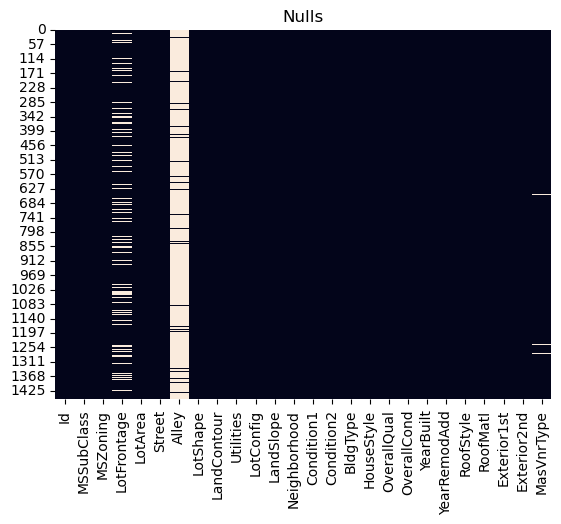

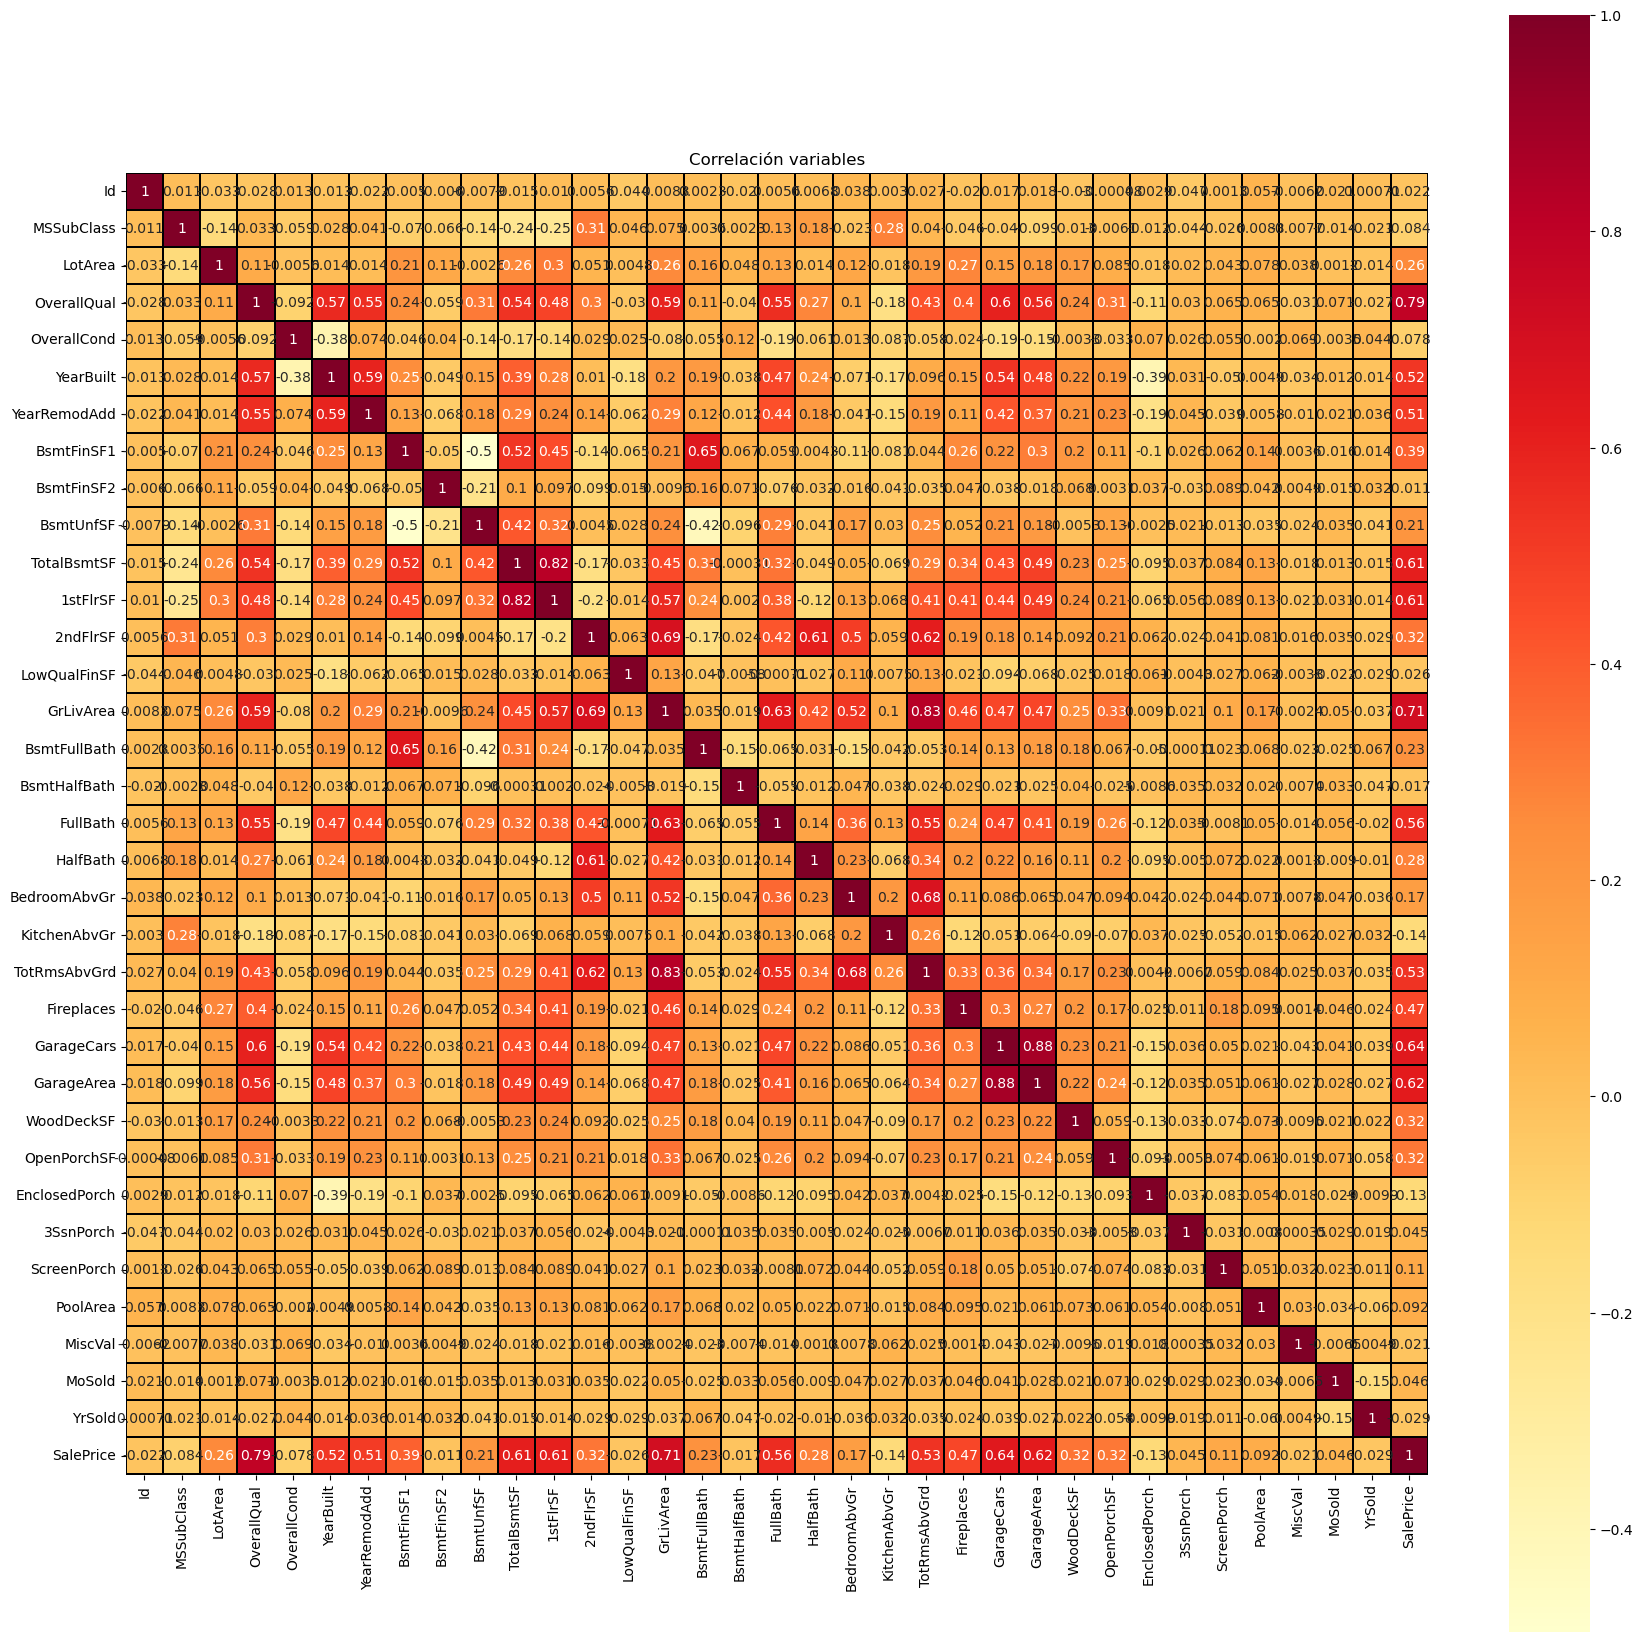

In [5]:
from seaborn import heatmap
from matplotlib.pyplot import title
#los analizaré por partes
print(df.loc[:,:"MasVnrType"].isnull().sum())
heatmap(df.loc[:,:"MasVnrType"].isnull(), cbar=False).set_title("Nulls")

"""observo que hay muchos nulos en Alley y lotfrontage, lo que hare es un adelanto al análisis
bivariente para saber que tan correlacionadas están a salesprice por ejemplo"""

#LotFrontage Variable 
from seaborn import heatmap
from matplotlib.pyplot import figure
correlacion=df.corr()
figure(figsize=(21,21))
heatmap(data=correlacion, vmax=1, cmap="YlOrRd", cbar=True, 
        square=True, annot=True, linewidths=0.01, linecolor="black" )
title("Correlación variables")

#Alley Variable
h=((df.Alley.notnull().sum())*100/len(df.index))
print('\n\n')
print("el porcentaje de not nulls en Alley es de: %.2f" %h+"%")

#MasVnrType Variable
"""MasVnrType es el tipo de revestimiento de mampostería, por lo cual tiene algo de relación con 
"Exterior1st" y "Exterior2nd" los cuales son los revestimientos de la casa
"""
a=df.MasVnrType.isnull().sum()
print('\n\n')
print("Cantidad de filas nulls en MasVnrType: %.0f" %a)
print('\n\n')

set_Exterior1st=df[df.MasVnrType.isnull()]["Exterior1st"].tolist()
set_Exterior1st=set(set_Exterior1st)

set_Exterior2nd=df[df.MasVnrType.isnull()]["Exterior2nd"].tolist()
set_Exterior2nd=set(set_Exterior2nd)
#con estas dos listas anteriores se determinarán las diversas combinaciones
dx=df[df.MasVnrType.notnull()]
dx["MasVnrType2"]=dx["MasVnrType"]
dx1=dx.groupby(["Exterior1st","Exterior2nd","MasVnrType2"]).agg({"MasVnrType":"count"})
dx1=dx1[dx1.MasVnrType>0].reset_index()
cond1=(dx1["Exterior1st"].isin(set_Exterior1st))
cond2=(dx1["Exterior2nd"].isin(set_Exterior2nd))
dx1=dx1[(cond1 & cond2)]
print("Combinaciones de los nulls en registros donde no hay nulls")
print(dx1)
print("Tabla de valores nulos de MasVnrType")
print(df[df.MasVnrType.isnull()][["MasVnrType","Exterior1st","Exterior2nd"]])
#con las combinaciones anteriores asigno valores de datos faltantes en MasVnrType
df["MasVnrType"].loc[234]="None"#de la combinación VinylSd-VinylSd la mayor parte no usa mampostería
df["MasVnrType"].loc[529]="None"#No hay una combinación 'Wd Sdng'-stone, asigno tomando 1era variable
df.loc[[650,936,973,977,1243,1278],"MasVnrType"]="None" #el resto
print("Cantidad de nulls en MasVnrType",df["MasVnrType"].isnull().sum()) #ya no hay nulos





In [6]:

"""observaciones:
1). En cuanto a "LotFrontage" la mayor correlación es con la variable "1erFlrSF" 
(área en pies cuadrados de la planta baja), y en cuanto con la variable "salesPrice" 
esta tiene una correlación relativamente baja e incluso se observa una mayor 
correlación entre "1erFlrSF"y "SalePrice", debido a ello, "LotFrontage" (pies lineales de 
calle de la parcela), no la tomaré en consideración en el dataframe debido a la alta cantidad 
de nulos y al no tener una gran influencia en el precio de venta, ya que valores altos de 
esta área no reflejan incrementos considerables en el "SalesPrice".

2). Se observa que en la variable Alley son demasiados nulls, debido a ello y al ser el tipo de 
acceso al callejón lo excluiré del dataframe.
"""  
#por las razones anteriores:
df.drop(["Alley", "LotFrontage"], axis="columns", inplace=True)


In [7]:
#continuo con la otra parte de datos nulos
print(df.loc[:,"MasVnrArea":"HalfBath"].isnull().sum())
"""las variables catégoricas concernientes a la descripción del sótano se rellenarán con el
dato más frecuente
"""


MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
dtype: int64


'las variables catégoricas concernientes a la descripción del sótano se rellenarán con el\ndato más frecuente\n'

Text(0.5, 1.0, 'BsmtQual not nulls')

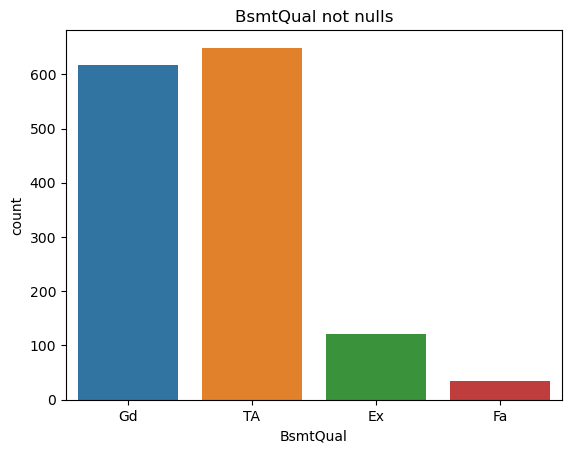

In [8]:
from seaborn import countplot
from matplotlib.pyplot import plot
data=df[df.notnull()]
countplot(data=data, x="BsmtQual").set_title("BsmtQual not nulls") #es TA el más frecuente



Text(0.5, 1.0, 'BsmtCond not nulls')

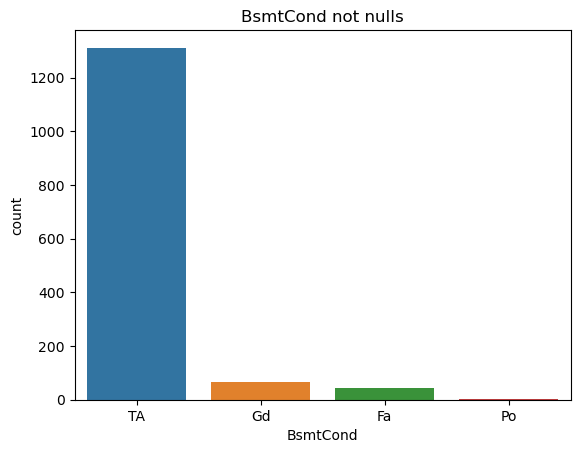

In [9]:
countplot(data=data, x="BsmtCond").set_title("BsmtCond not nulls") #es TA


Text(0.5, 1.0, 'BsmtExposure not nulls')

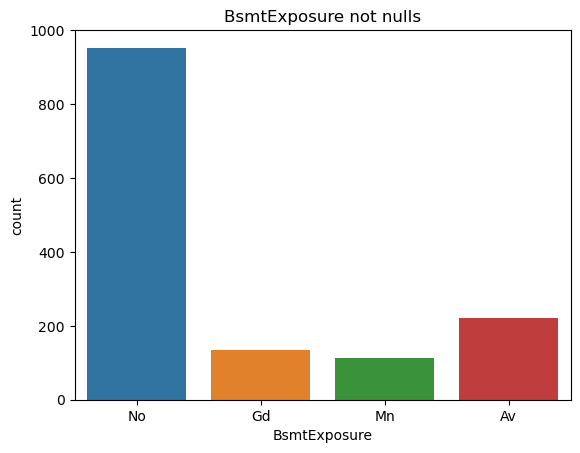

In [10]:
countplot(data=data, x="BsmtExposure").set_title("BsmtExposure not nulls") #es No

Text(0.5, 1.0, 'BsmtFinType1 Pie')

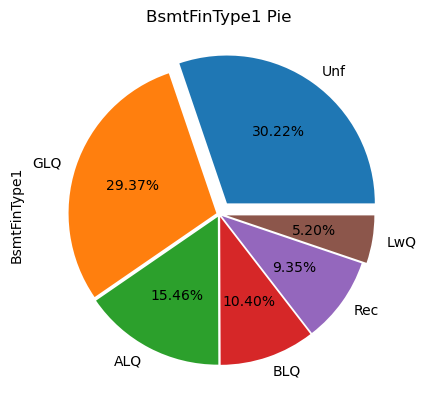

In [11]:
explode=[0.09,0.02,0.02,0.02,0.02,0.05]
data["BsmtFinType1"].value_counts().plot.pie(autopct="%1.2f%%", explode=explode).set_title("BsmtFinType1 Pie") #"Unf"
#Unf


Text(0.5, 1.0, 'BsmtFinType2 Pie')

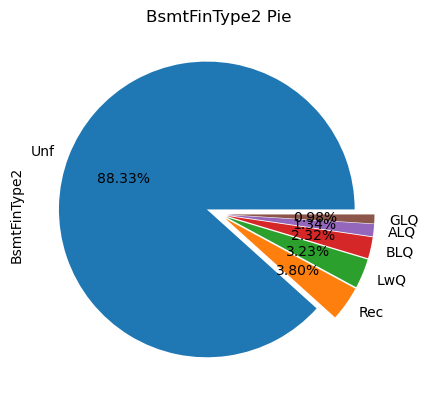

In [12]:
explode=[0.09,0.05,0.05,0.05,0.05,0.05]
data["BsmtFinType2"].value_counts().plot.pie(autopct="%1.2f%%", explode=explode).set_title("BsmtFinType2 Pie")
#Unf

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


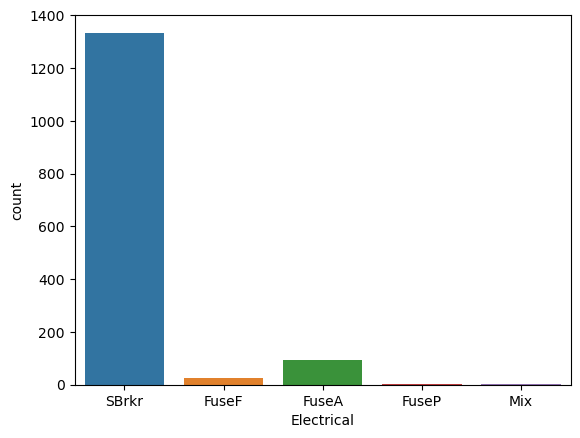

In [13]:
countplot(data=data, x="Electrical")
print(data["Electrical"].unique())
#SBrkr

In [14]:
"""Observación: MasVnrArea: área de revestimiento de mampostería en pies cuadrados si es cero,
el tipo de revestimiento (MasVnrType) debería ser "None" para que esto sea cierto"""
print(df[df.MasVnrArea.isnull()][["MasVnrArea","MasVnrType"]]) 
"""
con lo anterior observamos que es donde hay nulls es porque el MasVnrArea es none, por ende
asignamos el valor de cero a todas las filas nulas"""
df.loc[[234,529,650,936,973,977,1243,1278],"MasVnrArea"]=0
print(df.MasVnrArea.isnull().sum())


     MasVnrArea MasVnrType
234         NaN       None
529         NaN       None
650         NaN       None
936         NaN       None
973         NaN       None
977         NaN       None
1243        NaN       None
1278        NaN       None
0


In [15]:

df["BsmtQual"]=df["BsmtQual"].astype(str)
df["BsmtQual"].replace({nan:"TA"}, inplace=True)


df["BsmtCond"]=df["BsmtCond"].astype(str)#solo para el replace
df[df.BsmtCond.isnull()]["BsmtCond"].replace({nan:"TA"}, inplace=True)


df["BsmtExposure"]=df["BsmtExposure"].astype(str)
df[df.BsmtExposure.isnull()]["BsmtExposure"].replace("No", inplace=True)

df["BsmtFinType1"]=df["BsmtFinType1"].astype(str)
df[df.BsmtFinType1.isnull()]["BsmtFinType1"].replace("Unf", inplace=True)


df["BsmtFinType2"]=df["BsmtFinType2"].astype(str)
df[df.BsmtFinType2.isnull()]["BsmtFinType2"].replace("Unf", inplace=True)


df["Electrical"]=df["Electrical"].astype(str)
df[df.Electrical.isnull()]["Electrical"].replace("SBrkr", inplace=True)



In [16]:

df.loc[:,"MasVnrArea":"HalfBath"].isnull().sum().sort_values(ascending=True)
print(df.loc[:,"MasVnrArea":"HalfBath"].isnull().sum())


MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64


In [17]:
#continunando con la otra parte de datos nulos
df.loc[:,"BedroomAbvGr":"Fence"].isnull().sum().sort_values(ascending=True)


BedroomAbvGr        0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCars          0
GarageArea          0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
GarageYrBlt        81
GarageQual         81
GarageCond         81
GarageType         81
GarageFinish       81
FireplaceQu       690
Fence            1179
PoolQC           1453
dtype: int64

In [18]:
set_option("display.max_columns", None)
set_option("max_colwidth", None)
temporal=df[df.GarageYrBlt.isnull()]
temporal=temporal.loc[:,"GarageType":"GarageCond"]
temporal 
"""se observa que estas variables son nulas debido a que indican que no hay Garaje,
por ende se les asignara un string None indicando que no hay garaje y demás
"""
temporal.dtypes
df.loc[:,["GarageType","GarageFinish","GarageQual","GarageCond"]]=df.loc[:,["GarageType",
    "GarageFinish","GarageQual","GarageCond"]].fillna("None")
df.loc[:,["GarageYrBlt"]]=df.loc[:,["GarageYrBlt"]].fillna(0)
#las convierto en categoricas 
df[["GarageType","GarageFinish","GarageQual","GarageCond"]]=df[["GarageType",
        "GarageFinish","GarageQual","GarageCond"]].astype("category")

"""Se observan demasiados nulls para las variables: FireplaceQu(calidad de la chimenea), 
Fence(calidad de la valla), PoolQC(calidad de la piscina), debido a ello y tomando en cuenta
de que hay variables que se relacionan con estas como Fireplace, PoolArea y quizas estas sean
más determinantes a la hora de comprar una casa las eliminaré"""
df.drop(["FireplaceQu","Fence","PoolQC"], axis="columns", inplace=True)

In [19]:

"""Observación: Finalmente en cuanto a MiscFeature al ser característica miscelánea no cubierta 
en otras categorías, es razonable que tenga valores nulos en las filas que no tengan otra 
caracteristica de las descritas anteriormente, por ende ese les asignara un string None"""
df["MiscFeature"]=df["MiscFeature"].fillna("None")
print(df.MiscFeature.isnull().sum())

0


# # Asegurando el tipo de dato

In [20]:

exceptions=["MoSold","YrSold","PoolArea","GarageCars"] #estos no los transformare en categoricos
print("\n\n\n")
for i in df.columns:
 categorico=df.loc[:,i].unique()
 if((len(categorico)<=16) & (i not in exceptions)):
  #transformandolas
  df[i]=df[i].astype("category")
    
#continuando la transformación de tipo de data
from pandas import to_datetime
df["Neighborhood"]=df["Neighborhood"].astype("string")
df["MasVnrArea"]=df["MasVnrArea"].astype("float64")
df[df["MasVnrArea"]=="None"].replace({"None":0}, inplace=True)
df["GarageYrBlt"]=to_datetime(df["YrSold"], format='%Y').dt.year
df["YearBuilt"]=to_datetime(df["YearBuilt"], format='%Y').dt.year
df["YearRemodAdd"]=to_datetime(df["YearRemodAdd"], format='%Y').dt.year
df["YrSold"]=to_datetime(df["YrSold"], format='%Y').dt.year
df["MoSold"]=to_datetime(df["MoSold"], format='%m').dt.month
df["MiscFeature"]=df["MiscFeature"].astype("string")
df.loc[:,["PoolArea","MiscVal","ScreenPorch","3SsnPorch","LowQualFinSF","LotArea",
"BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea",
"WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"]]=df.loc[:,["PoolArea",
"MiscVal","ScreenPorch","3SsnPorch","LowQualFinSF","LotArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea",
"WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"]].astype("float64")

## Valores atípicos y estadistica descriptiva 





Id                0.000000
LotArea          12.207688
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
GarageYrBlt       0.096269
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64


C:\Users\auror\AppData\Local\Temp\ipykernel_23504\3168287742.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())#la asimetría


'Observación las variable más sesgadas a la derecha es MiscVal, PoolArea,LotArea. En cuanto a \nla variable Saleprice esta sesgada a la derecha, se analizará la razón posteriormente'

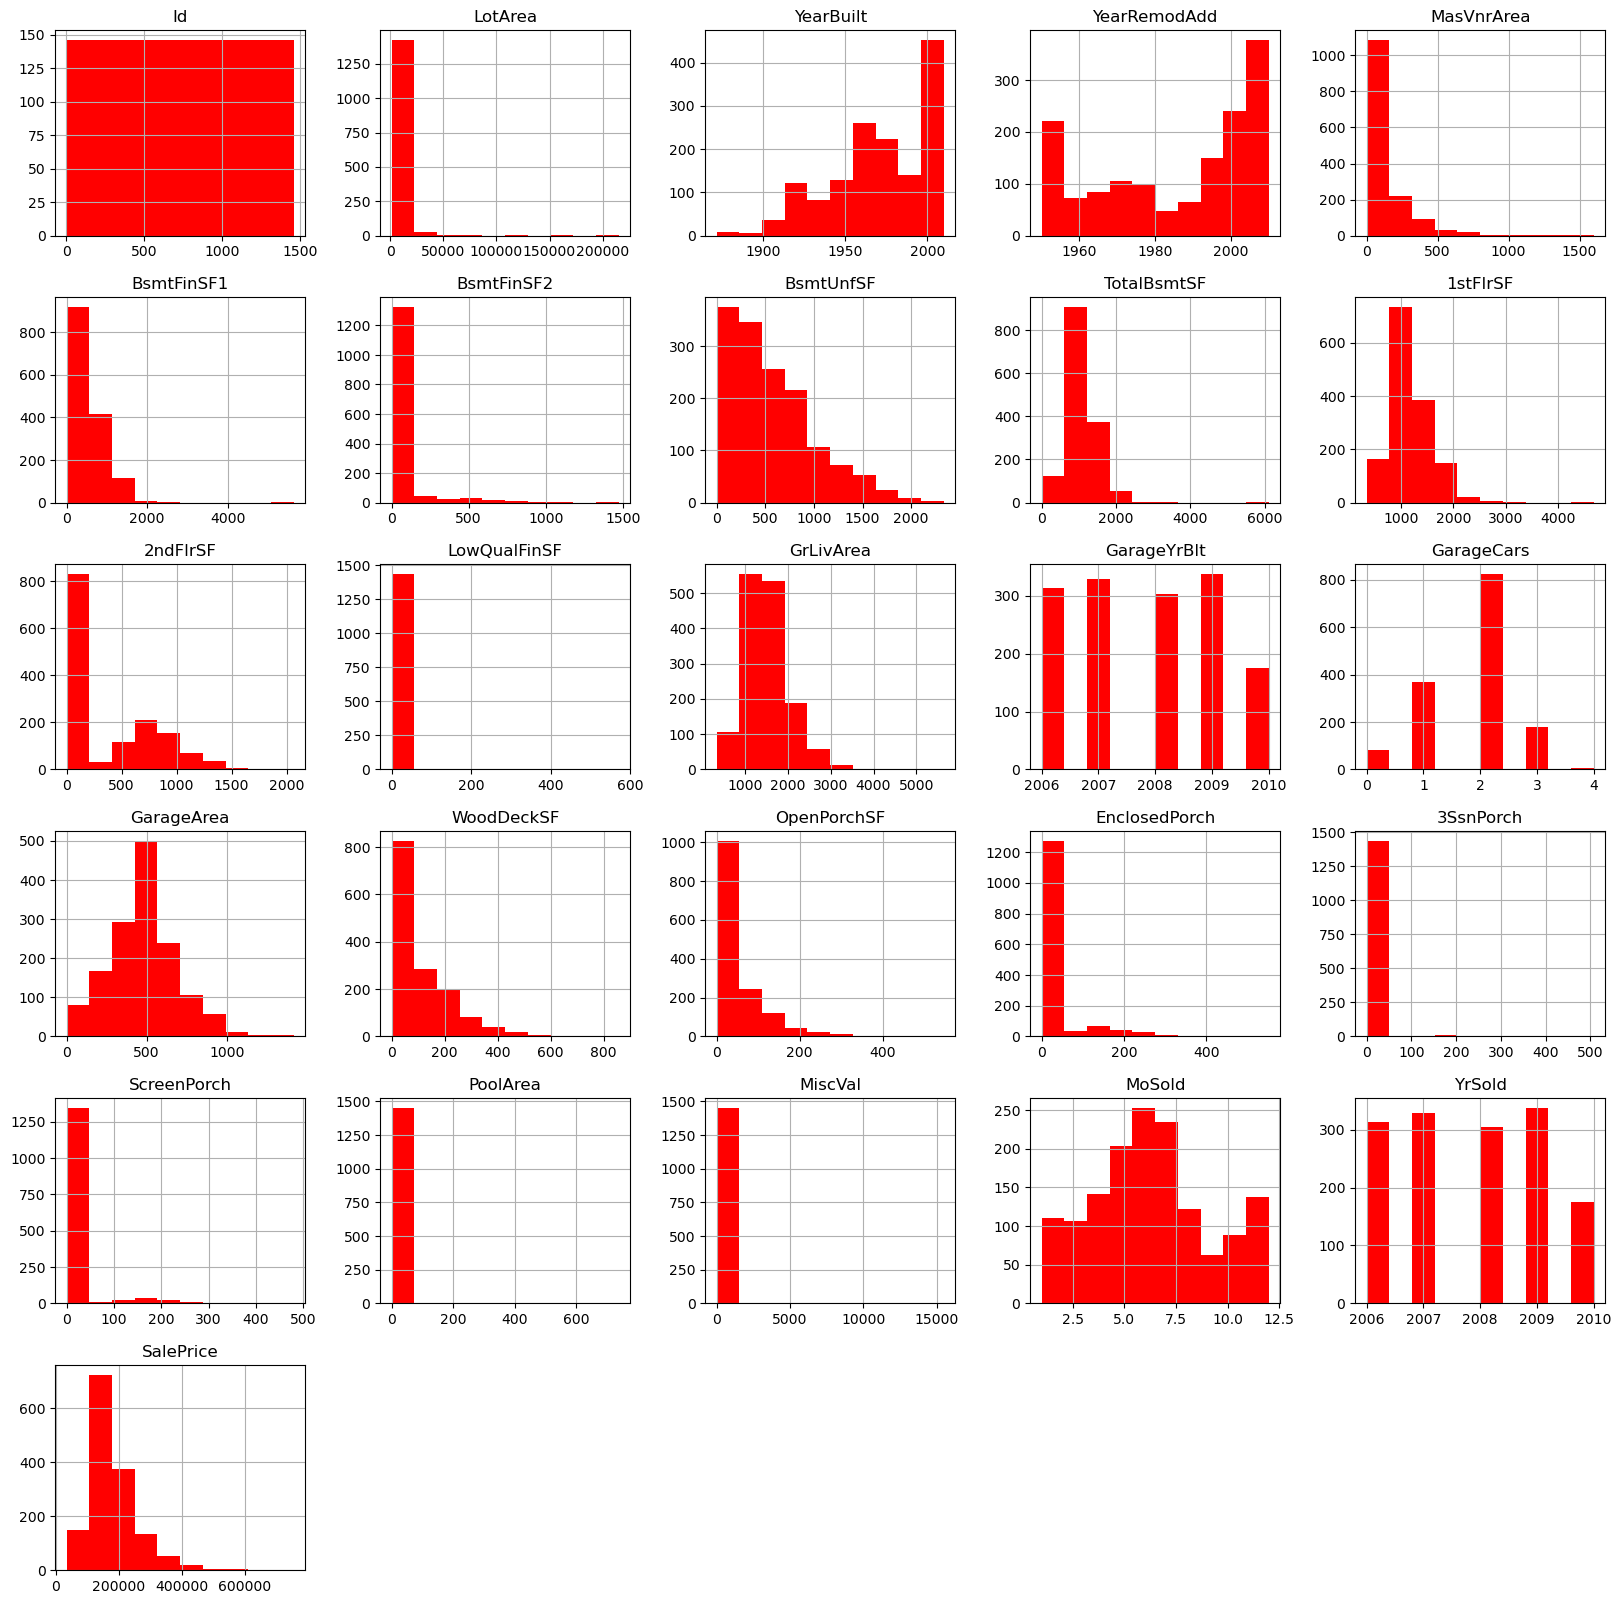

In [21]:
# observando la dispersión y la variablidad
from matplotlib.pyplot import hist
from numpy import count_nonzero
df.hist(bins=10, color="red", grid=True, figsize=(20,20)) #identificando sesgos
print("\n\n\n")
print(df.skew())#la asimetría
"""Observación las variable más sesgadas a la derecha es MiscVal, PoolArea,LotArea. En cuanto a 
la variable Saleprice esta sesgada a la derecha, se analizará la razón posteriormente"""

'Observación se puede apreciar que las variables más correlacionadas a Saleprice son\nGrLivArea, GarageCars, GarageArea, en otras palabras son las caracteristicas que más impactan\nen el precio de la casa'

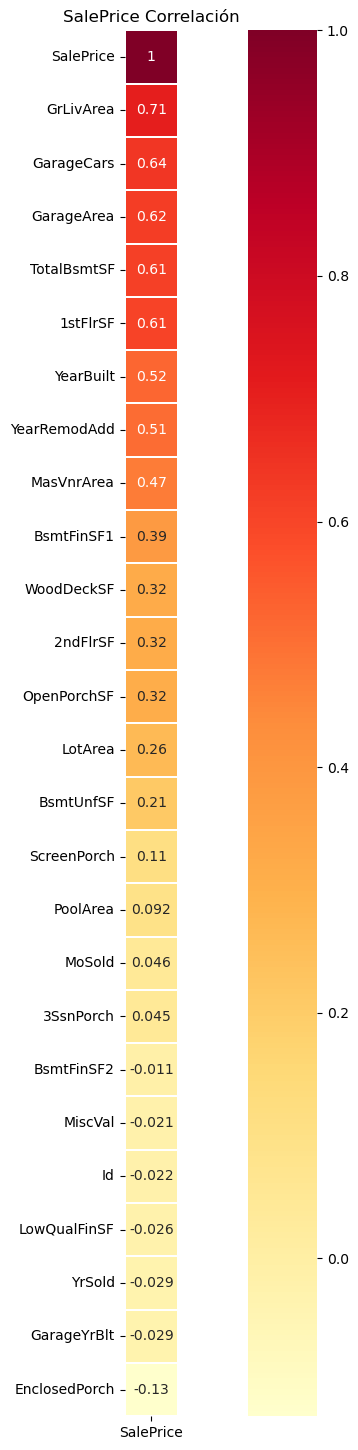

In [22]:
#correlaciones con la variable saleprice
spcorr=df.corr()
figure(figsize=(18,18))
heatmap(data=spcorr[["SalePrice"]].sort_values(by="SalePrice",ascending=False), vmax=1, 
square=True, linecolor="white", cmap="YlOrRd", cbar=True,linewidths=0.01, annot=True).set_title("SalePrice Correlación")
"""Observación se puede apreciar que las variables más correlacionadas a Saleprice son
GrLivArea, GarageCars, GarageArea, en otras palabras son las caracteristicas que más impactan
en el precio de la casa"""

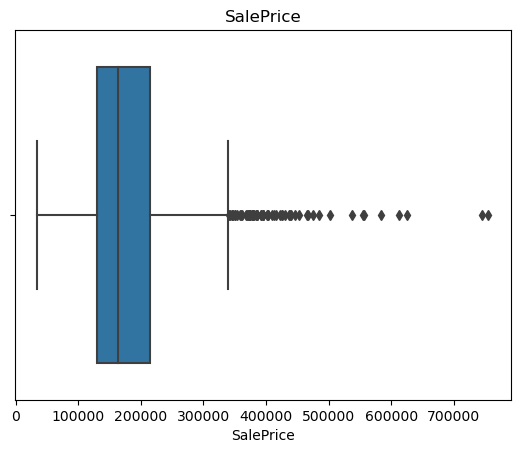

In [23]:
from seaborn import boxplot
boxplot(x="SalePrice", data=df).set_title("SalePrice")
#Se identificarán los valores atípicos de esta variable
from numpy import quantile
Q1=df["SalePrice"].quantile(0.25)
Q3=df["SalePrice"].quantile(0.75)
IQR=Q3-Q1
RANGE=IQR*1.5 #rango intercuartil ,más un 50% será nuestro umbral
val_atipicos=df[(df["SalePrice"]<Q1-RANGE) | (df["SalePrice"]>Q3+RANGE)]


GrLivArea      1.117592
TotalBsmtSF    0.430853
GarageCars    -2.765844
GarageArea     0.020049
1stFlrSF       0.613297
SalePrice      2.062555
dtype: float64


C:\Users\auror\AppData\Local\Temp\ipykernel_23504\2464923385.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outliers_skew=val_atipicos.skew()


'según lo anterior tomando en cuenta solo los valores atípicos se observa que las variables\nmás sesgadas son: GarageCars y GrLivArea de las 5 más correlacionadas con SalesPrice.\nEn cuanto a GrLivArea superficie habitable por encima del nivel del suelo en pies cuadrados a \nvalores mayores de 3000 son pocos y se observan que generan valores altos de SalePrice\nalgo que se esperaba ya que es la variable más correlacionada con SalePrice. En cuanto a TotalMsmtSF\npies cuadrados totales del sótano para valores cercanos a 2500 y mayores son pocos y tiende\na decrecer los valores de SalePrice. Para los GarageCars la moda es de 3 y genera una variedad\nde valores de SalePrice. GarageArea proporciona valores altos de SalePrice cuando se encuentra\ncercano a un área de 800 pies cuadrados. 1erFlrSF area en pies cuadrados de la primera planta \npara valores mayores de 2000 son pocos y generan diversos valores de SalePrice.\nSegún lo analizado en los gráficos y en el indicador de asimetría es GrL

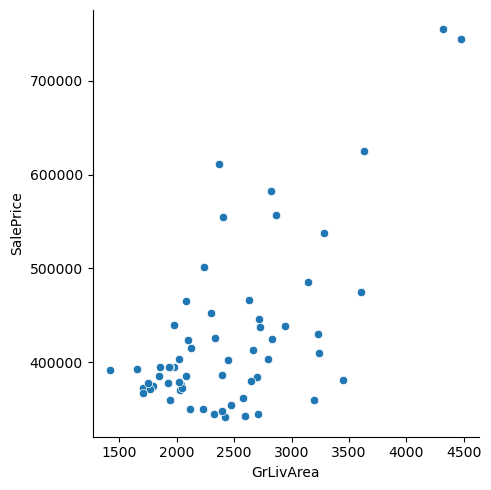

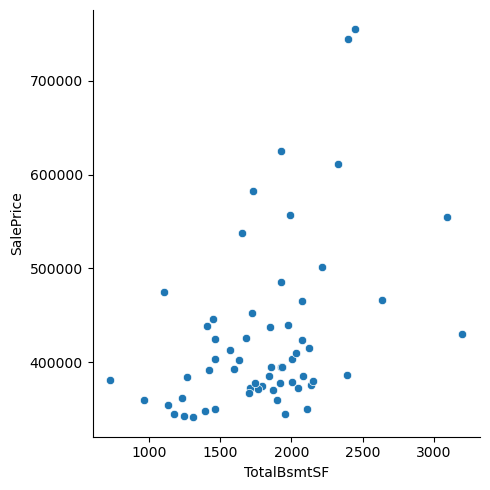

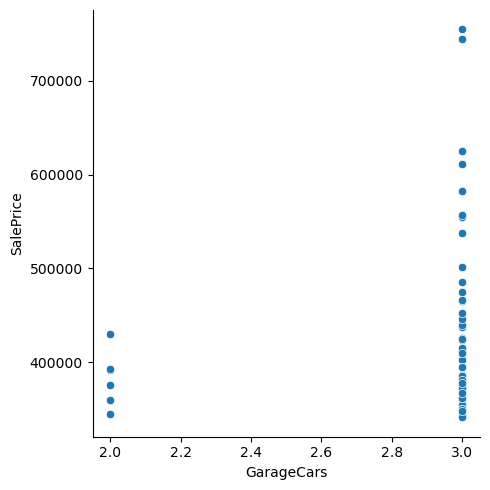

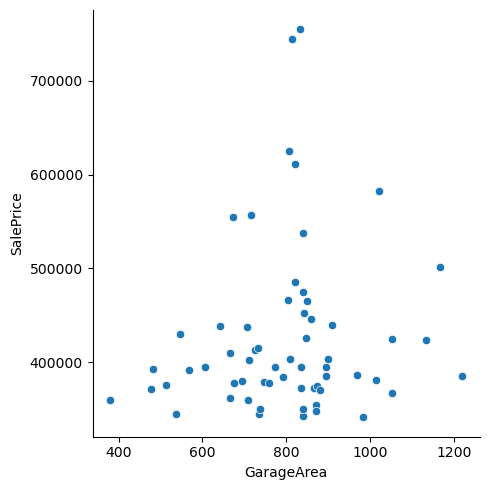

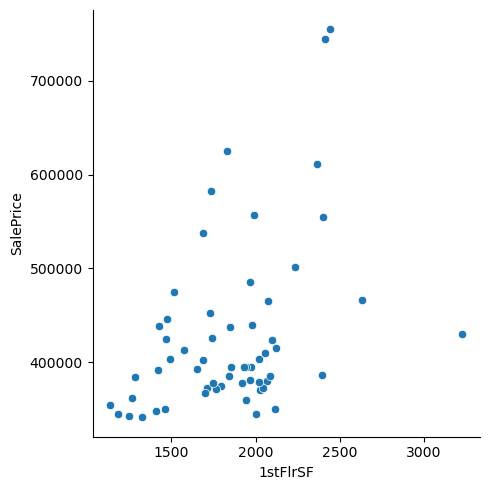

In [24]:
from seaborn import relplot
relplot(data=val_atipicos,y="SalePrice",x="GrLivArea")
relplot(data=val_atipicos,y="SalePrice",x="TotalBsmtSF")
relplot(data=val_atipicos,y="SalePrice",x="GarageCars")
relplot(data=val_atipicos,y="SalePrice",x="GarageArea")
relplot(data=val_atipicos,y="SalePrice",x="1stFlrSF")
outliers_skew=val_atipicos.skew()
print(outliers_skew[["GrLivArea","TotalBsmtSF","GarageCars","GarageArea","1stFlrSF","SalePrice"]])
"""según lo anterior tomando en cuenta solo los valores atípicos se observa que las variables
más sesgadas son: GarageCars y GrLivArea de las 5 más correlacionadas con SalesPrice.
En cuanto a GrLivArea superficie habitable por encima del nivel del suelo en pies cuadrados a 
valores mayores de 3000 son pocos y se observan que generan valores altos de SalePrice
algo que se esperaba ya que es la variable más correlacionada con SalePrice. En cuanto a TotalMsmtSF
pies cuadrados totales del sótano para valores cercanos a 2500 y mayores son pocos y tiende
a decrecer los valores de SalePrice. Para los GarageCars la moda es de 3 y genera una variedad
de valores de SalePrice. GarageArea proporciona valores altos de SalePrice cuando se encuentra
cercano a un área de 800 pies cuadrados. 1erFlrSF area en pies cuadrados de la primera planta 
para valores mayores de 2000 son pocos y generan diversos valores de SalePrice.
Según lo analizado en los gráficos y en el indicador de asimetría es GrLivArea quien esta
generando los valores altos de SalePrice, razón posible por la que SalePrice esta sesgada a 
la derecha.
"""

'Se observan que hay vecindarios como el NridgHt, NoRidge y el StoneBr que generan algunos\nvalores altos de Saleprice siempre relacionados a valores altos de GrLivArea, es evidente que\nlas casas más recientes son las más caras, y en su gran mayoria son de menos de 3500 pies cuadrados\nesto explica por lo que para valores menores a 3000 en GrLivArea se presentaban valores relativa-\nmente altos en SalePrice y se observa que la mayor parte de estos datos atípicos pertenecen\na la zona RL'

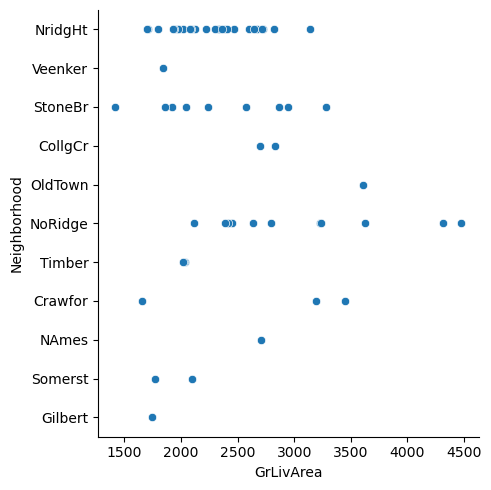

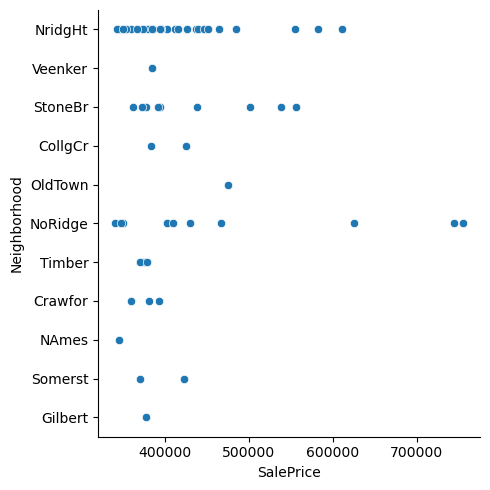

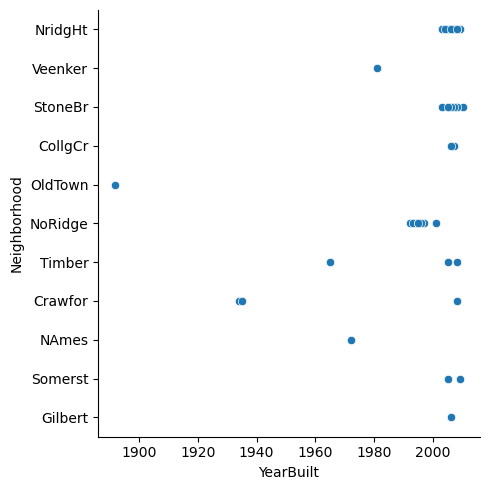

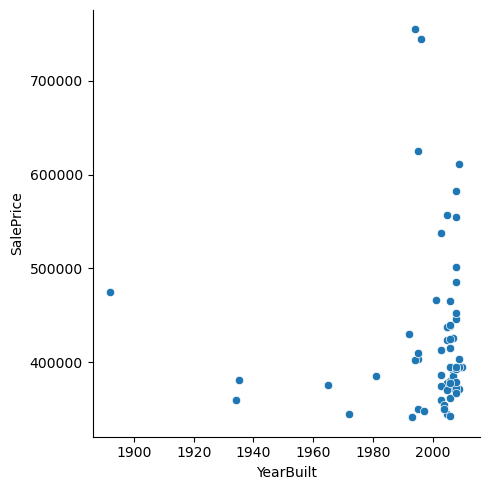

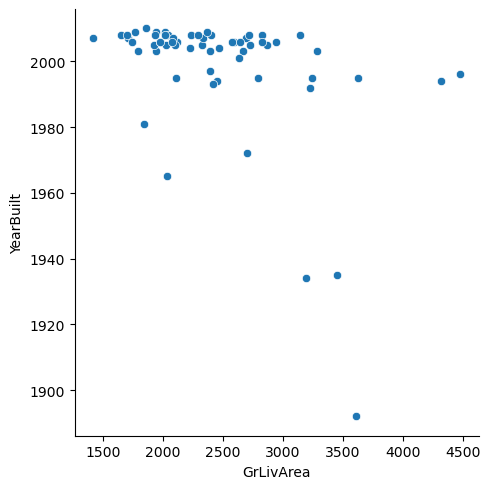

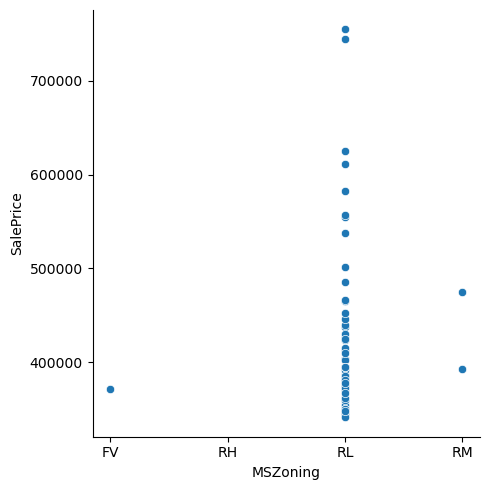

In [25]:

relplot(data=val_atipicos,y="Neighborhood",x="GrLivArea")
relplot(data=val_atipicos,y="Neighborhood",x="SalePrice")
relplot(data=val_atipicos,y="Neighborhood",x="YearBuilt")
relplot(data=val_atipicos,y="SalePrice",x="YearBuilt")
relplot(data=val_atipicos,y="YearBuilt",x="GrLivArea")
relplot(data=val_atipicos,y="SalePrice",x="MSZoning")
"""Se observan que hay vecindarios como el NridgHt, NoRidge y el StoneBr que generan algunos
valores altos de Saleprice siempre relacionados a valores altos de GrLivArea, es evidente que
las casas más recientes son las más caras, y en su gran mayoria son de menos de 3500 pies cuadrados
esto explica por lo que para valores menores a 3000 en GrLivArea se presentaban valores relativa-
mente altos en SalePrice y se observa que la mayor parte de estos datos atípicos pertenecen
a la zona RL"""



In [26]:
"""Una vez que se han observado el comportamiento de los valores atípicos, se recortarán"""
df_new=df[~((df["SalePrice"]<Q1-RANGE) | (df["SalePrice"]>Q3+RANGE))]
print("Resumen de estadistica descriptiva del dataframe con valores atípicos")
print(df["SalePrice"].describe())
print("\n\n\n")
print("Resumen de estadistica descriptiva del dataframe sin valores atípicos")
print(df_new["SalePrice"].describe())

Resumen de estadistica descriptiva del dataframe con valores atípicos
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64




Resumen de estadistica descriptiva del dataframe sin valores atípicos
count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64


## Análisis Univariante SalePrice

'Se observan que se modificarón las correlaciones de diversas variables e incluso el orden\nen que aparecen'

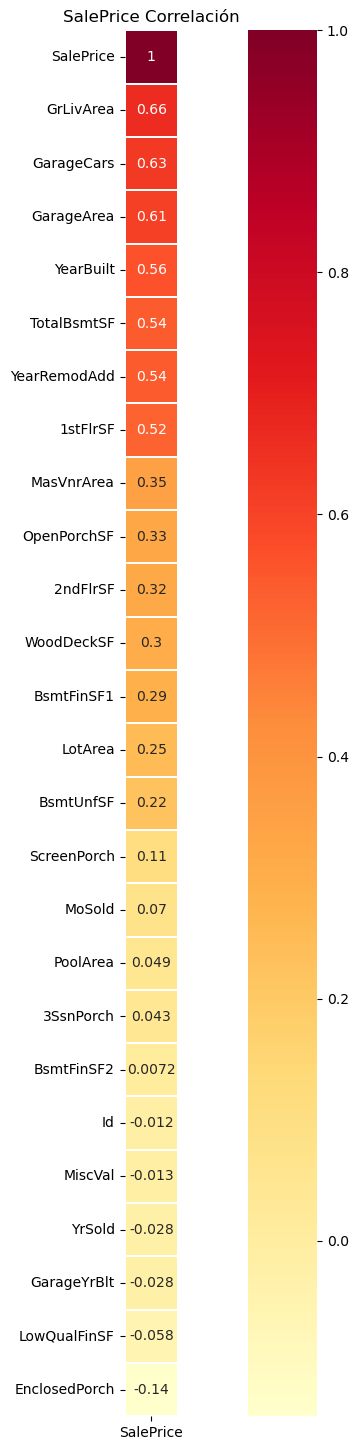

In [27]:
new_corr=df_new.corr()
figure(figsize=(18,18))
heatmap(data=new_corr[["SalePrice"]].sort_values(by="SalePrice",ascending=False), vmax=1, 
square=True, linecolor="white", cmap="YlOrRd", cbar=True,linewidths=0.01, annot=True).set_title("SalePrice Correlación")
"""Se observan que se modificarón las correlaciones de diversas variables e incluso el orden
en que aparecen"""                                                                                              

Id               -0.014452
LotArea          11.172705
YearBuilt        -0.573143
YearRemodAdd     -0.447907
MasVnrArea        2.777744
BsmtFinSF1        1.874497
BsmtFinSF2        4.219695
BsmtUnfSF         0.815369
TotalBsmtSF       1.627364
1stFlrSF          1.437226
2ndFlrSF          0.749328
LowQualFinSF      9.002292
GrLivArea         1.259842
GarageYrBlt       0.094260
GarageCars       -0.387991
GarageArea        0.113620
WoodDeckSF        1.540437
OpenPorchSF       2.475038
EnclosedPorch     3.052834
3SsnPorch        10.710296
ScreenPorch       4.162005
PoolArea         15.752503
MiscVal          23.961924
MoSold            0.230928
YrSold            0.094260
SalePrice         0.679739
dtype: float64


C:\Users\auror\AppData\Local\Temp\ipykernel_23504\2851611711.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_new.skew())


'Las variables más sesgadas a la derecha son MiscVal, PoolArea, LotArea y 3SsnPorch'

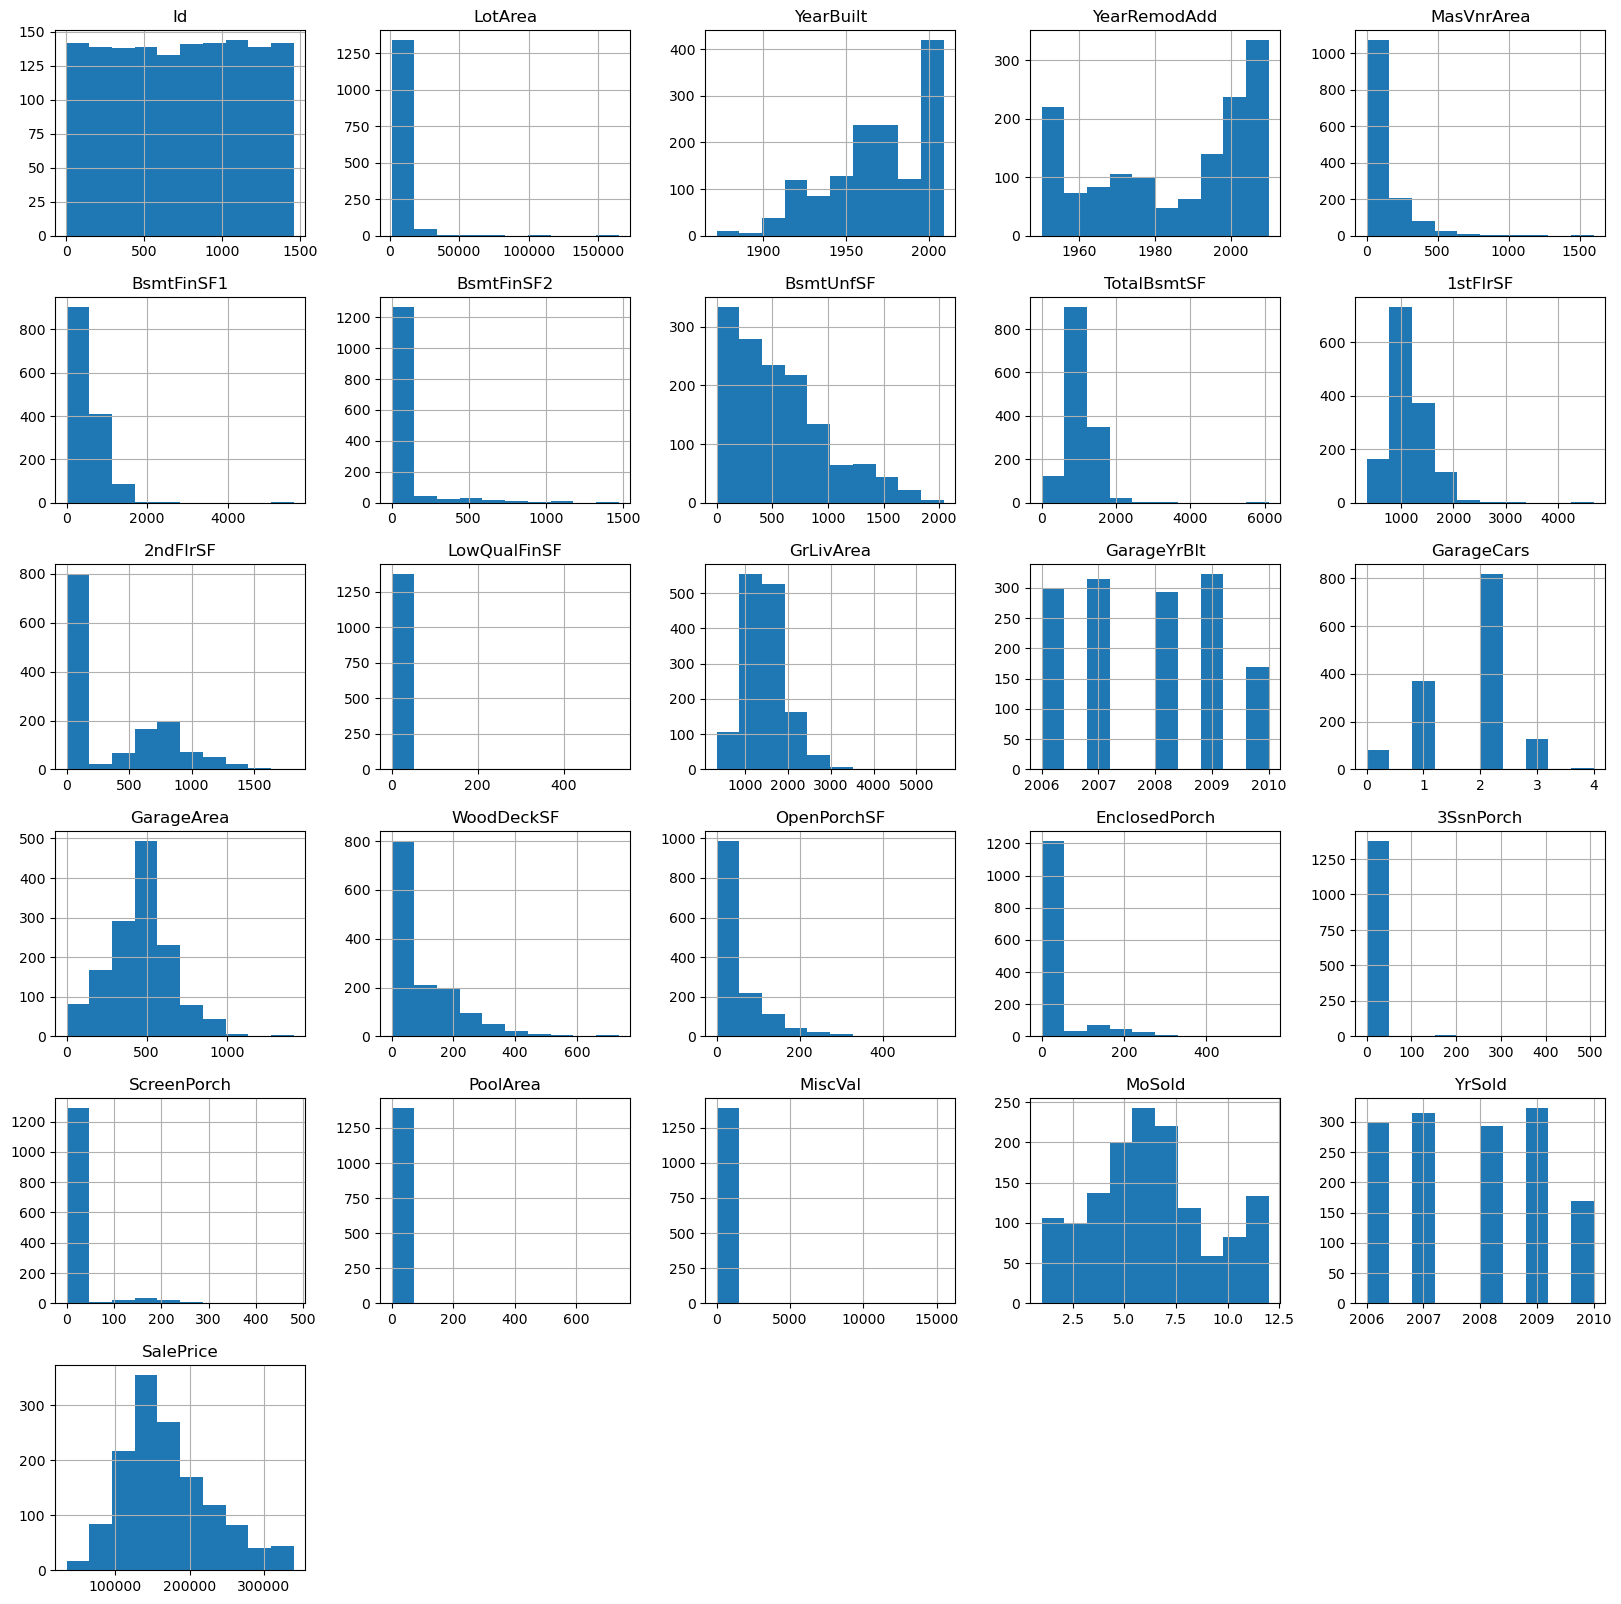

In [28]:
df_new.hist(figsize=(20,20), bins=10, grid=True)
print(df_new.skew())
"""Las variables más sesgadas a la derecha son MiscVal, PoolArea, LotArea y 3SsnPorch"""

'Se muestra una gran disminución de los valores atípicos, la media, mediana, max y min\nse han desplazado en comparación de cuando se tomaban en cuenta los valores atípicos en la\nmuestra'

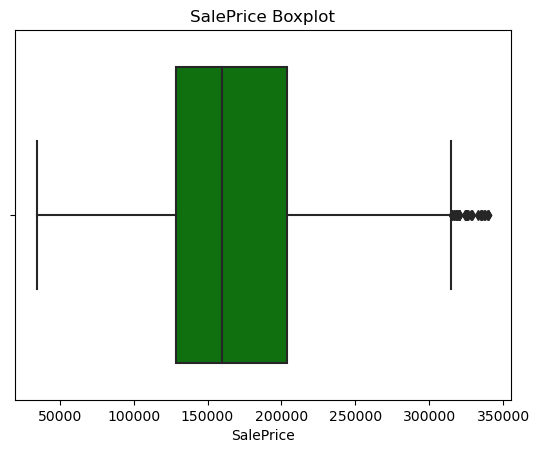

In [29]:
from seaborn import boxplot
from matplotlib.pyplot import title
boxplot(data=df_new, x="SalePrice", color="green")
title("SalePrice Boxplot")
"""Se muestra una gran disminución de los valores atípicos, la media, mediana, max y min
se han desplazado en comparación de cuando se tomaban en cuenta los valores atípicos en la
muestra"""


## Análisis univariante SaleCondition

'Se observa que la gran mayoría de las SaleCondition son Normal'

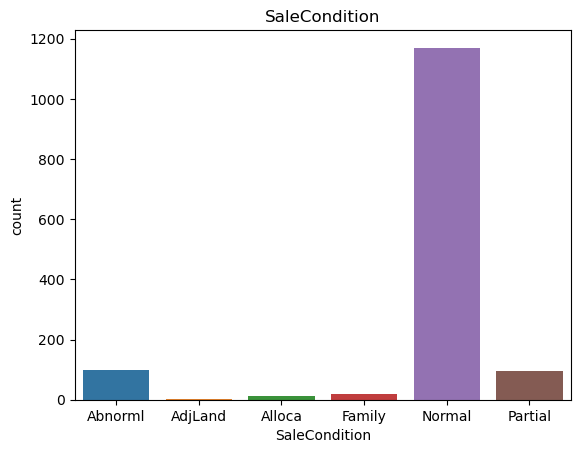

In [30]:
countplot(data=df_new, x="SaleCondition").set_title("SaleCondition")
"""Se observa que la gran mayoría de las SaleCondition son Normal"""


## Análisis Multivariante

'Se observa que para la mayoria de los vecindarios se obtienen valores altos de SalePrice\nen su gran mayoría cuando se aproximan a 3000 pies cuadrados de GrLivArea siendo el tipo\nde vivienda (BLdgType) "1Fam" (tipo más vendido), sin embargo para un tipo "TwnhsE", a pesar de \ntener valores relativamente bajos obtiene valores altos en vecindarios como Veenker y NridgHt'

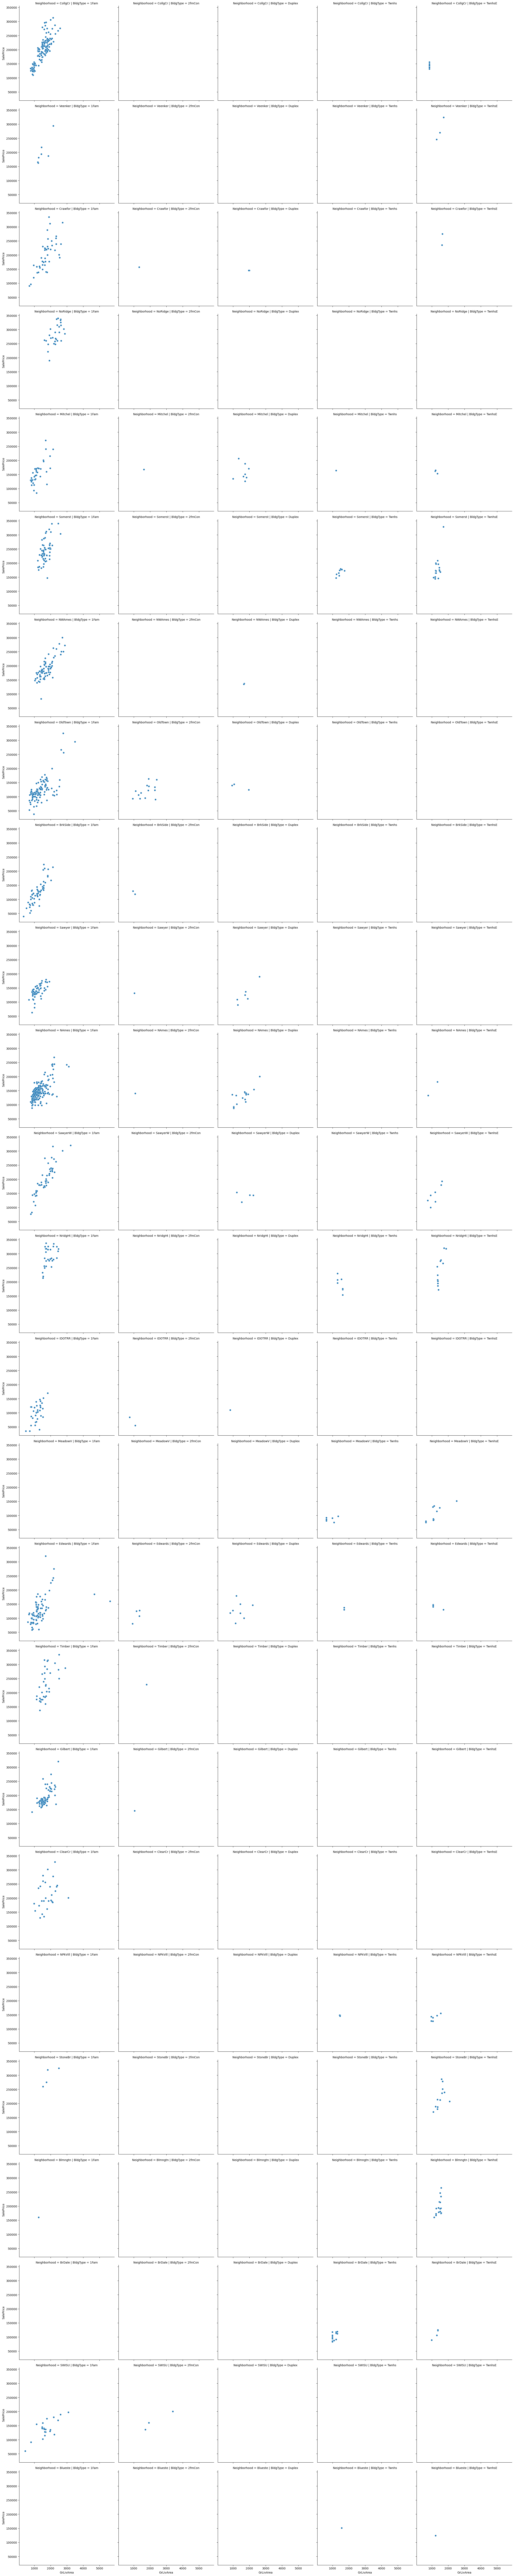

In [31]:
relplot(data=df_new, y="SalePrice", x="GrLivArea", row="Neighborhood", col="BldgType")
"""Se observa que para la mayoria de los vecindarios se obtienen valores altos de SalePrice
en su gran mayoría cuando se aproximan a 3000 pies cuadrados de GrLivArea siendo el tipo
de vivienda (BLdgType) "1Fam" (tipo más vendido), sin embargo para un tipo "TwnhsE", a pesar de 
tener valores relativamente bajos obtiene valores altos en vecindarios como Veenker y NridgHt"""

'\nValores de OverallQual (calidad general del material y de acabado) altos hacen que los valores\nde SalePrice incrementen, sin embargo a pesar de que la calidad general del material era menor\nde 6 hubieron diversas ventas en los estilos de vivienda (HouseStyle) 1.5Fin y 1Story siempre\ncon 1fam como tipo de vivienda (BldgType).\n'

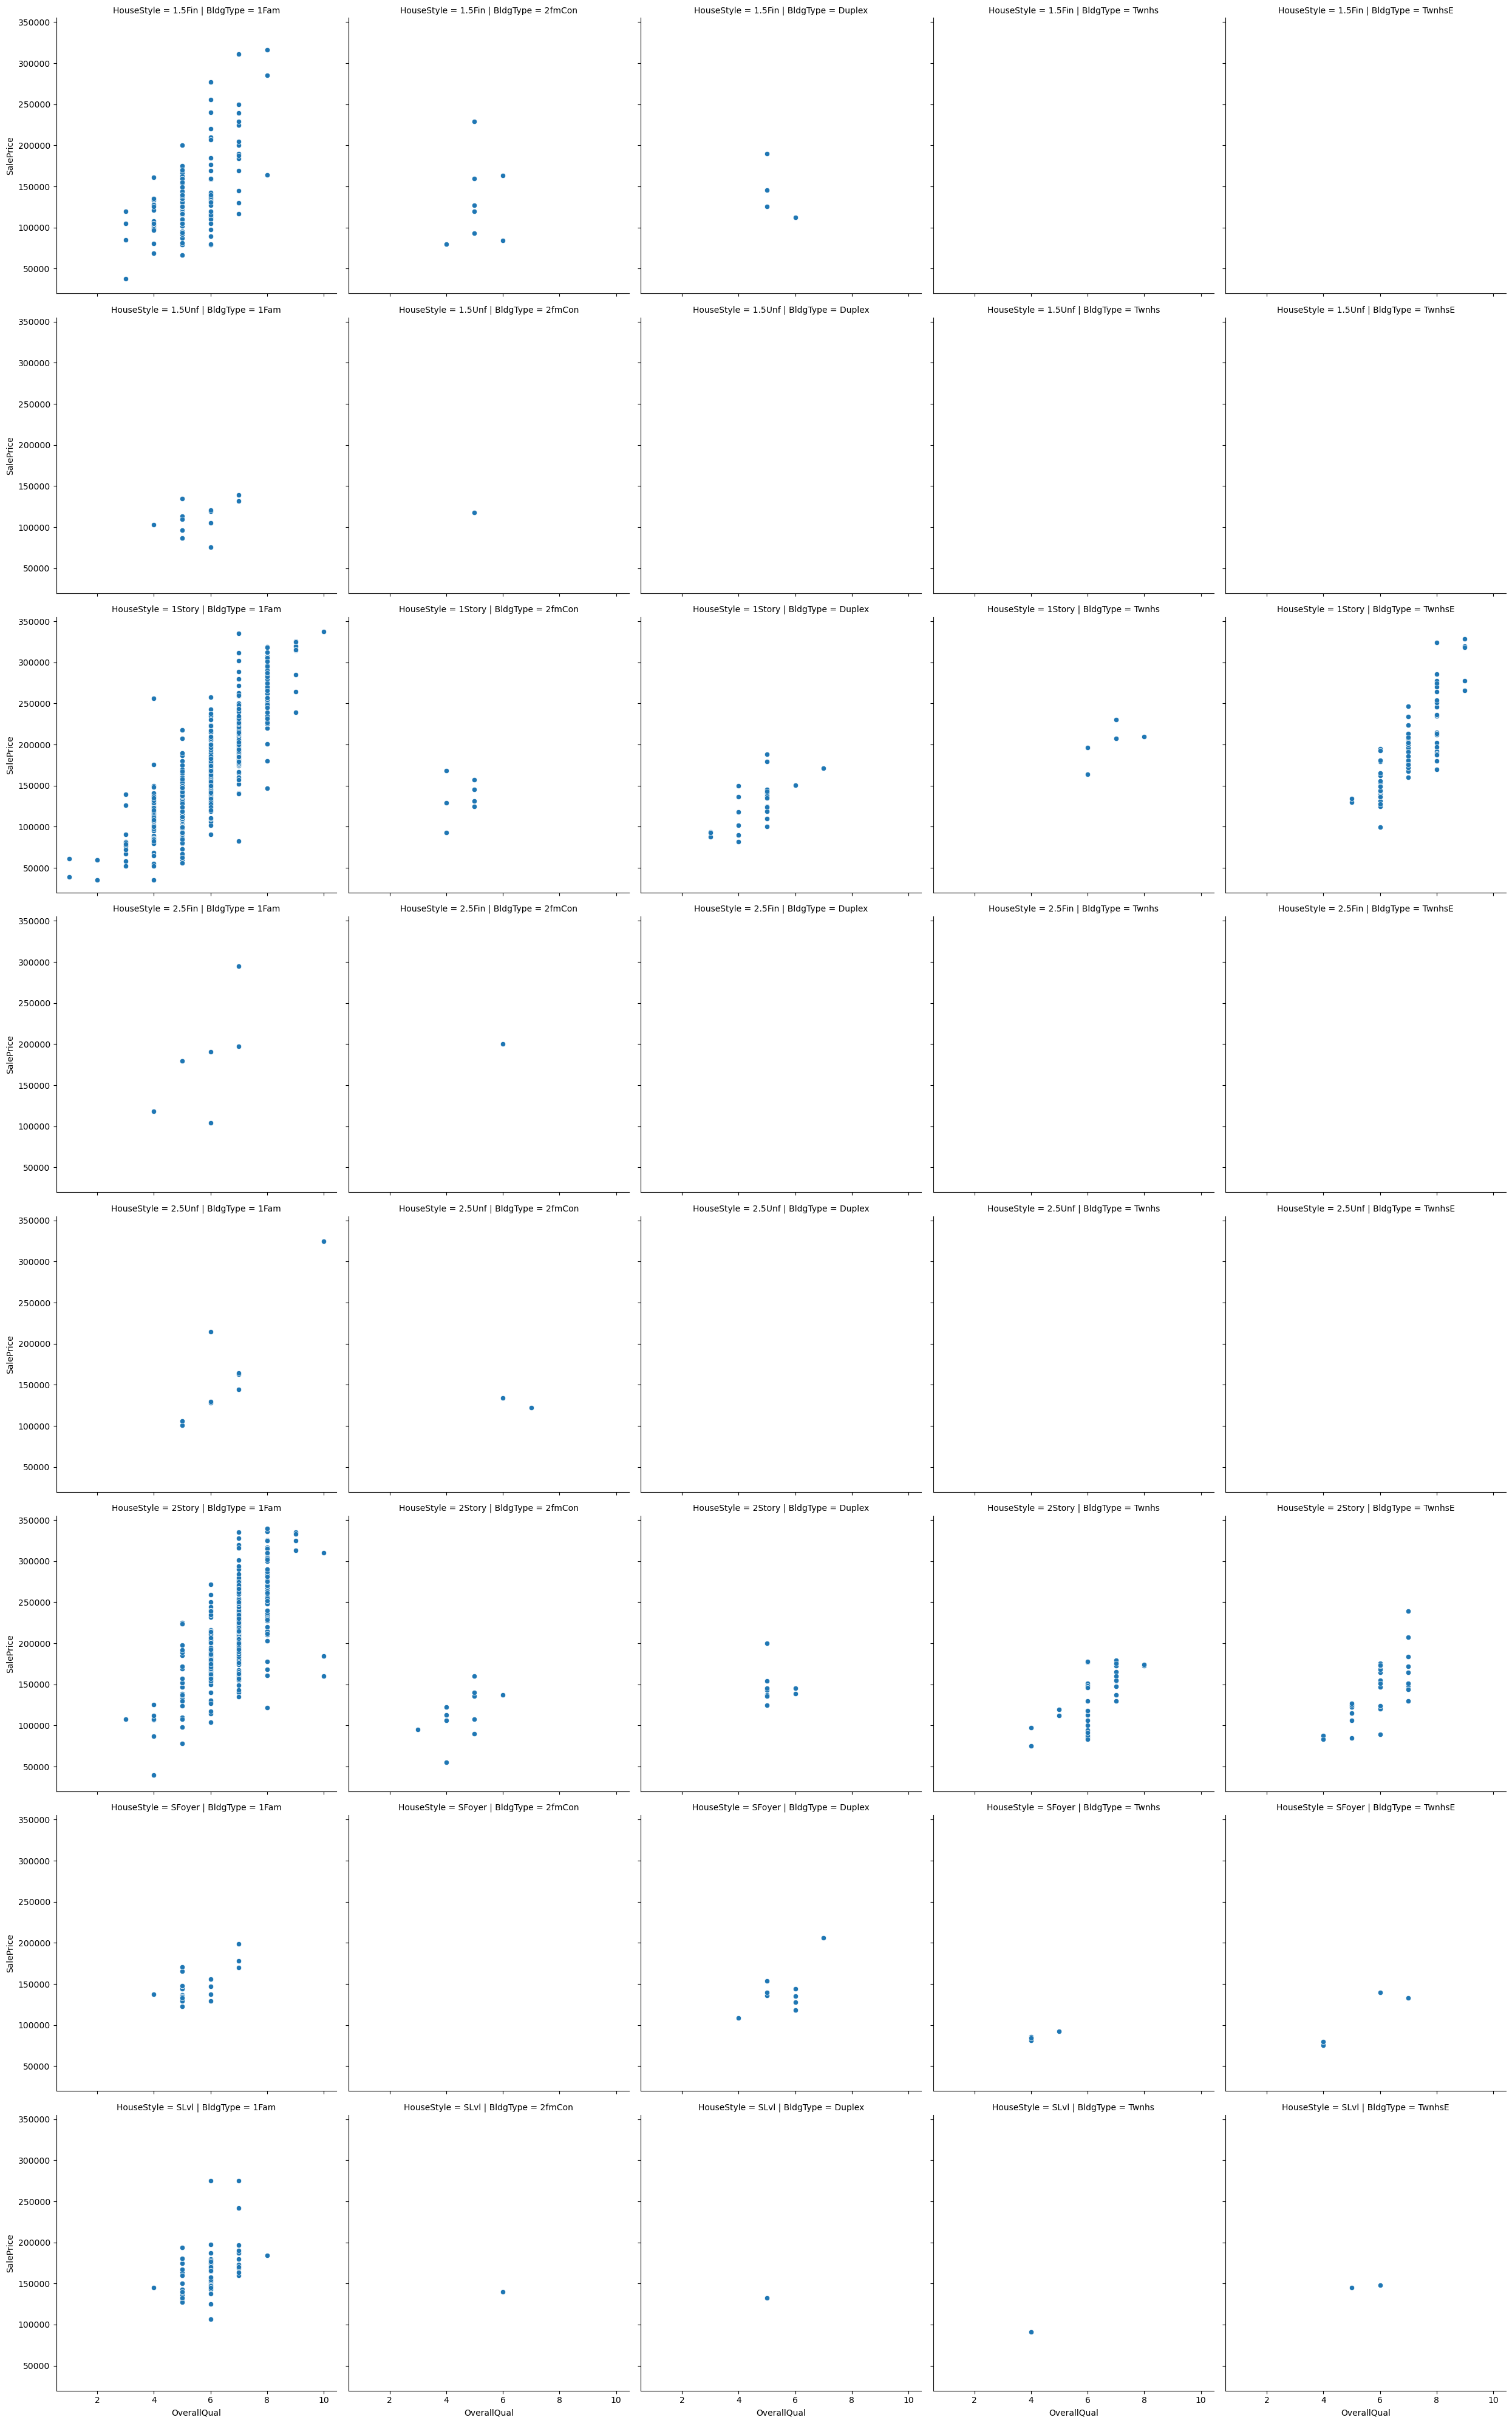

In [32]:
relplot(data=df_new, y="SalePrice", x="OverallQual", row="HouseStyle", col="BldgType")
"""
Valores de OverallQual (calidad general del material y de acabado) altos hacen que los valores
de SalePrice incrementen, sin embargo a pesar de que la calidad general del material era menor
de 6 hubieron diversas ventas en los estilos de vivienda (HouseStyle) 1.5Fin y 1Story siempre
con 1fam como tipo de vivienda (BldgType).
"""

'\nLa mayor cantidad de ventas es de un SaleCondition del tipo "Norm" siempre con un tipo de vivienda\n(BldgType) 1Fam. La mayor cantidad de ventas con OverallCond (condición general) fue de >= 5,\nincluso se observan en un valor de este de 7 aproximadamente los valores de SalePrice más altos \nindependiente del tipo de vivienda (BldgType).\n'

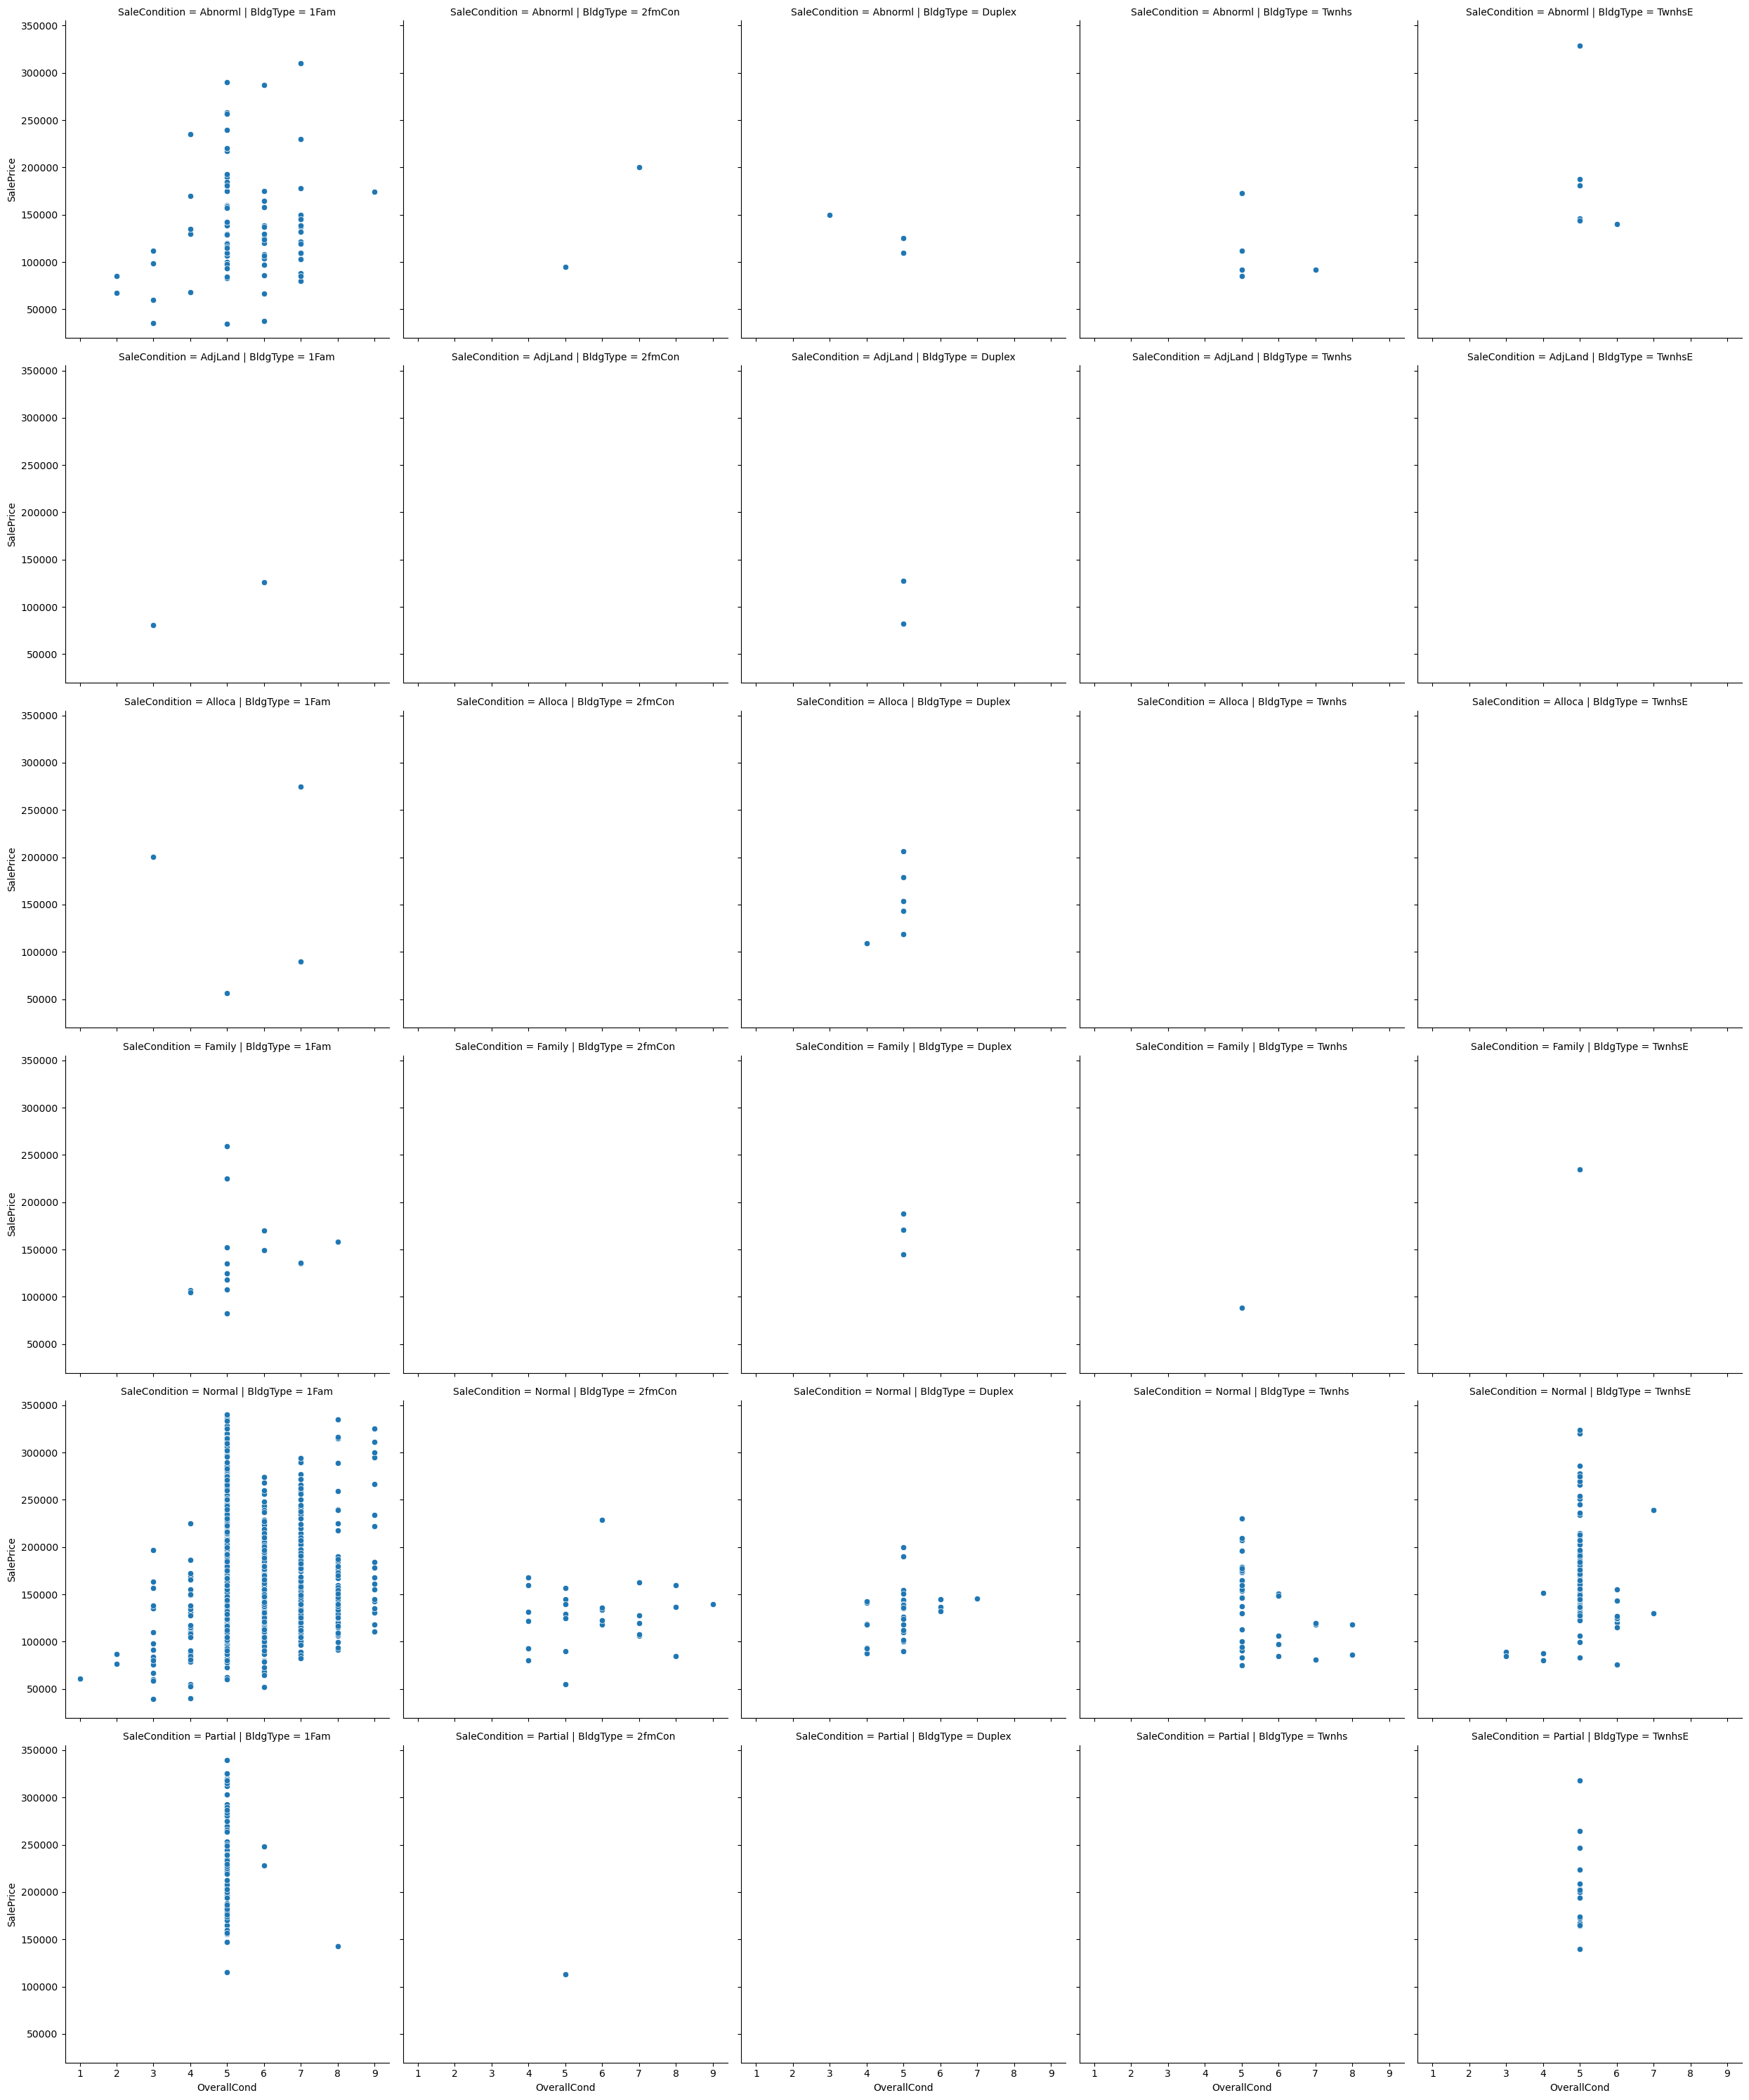

In [33]:
relplot(data=df_new, y="SalePrice", x="OverallCond", row="SaleCondition", col="BldgType")
"""
La mayor cantidad de ventas es de un SaleCondition del tipo "Norm" siempre con un tipo de vivienda
(BldgType) 1Fam. La mayor cantidad de ventas con OverallCond (condición general) fue de >= 5,
incluso se observan en un valor de este de 7 aproximadamente los valores de SalePrice más altos 
independiente del tipo de vivienda (BldgType).
"""

'Se observan que la mayor cantidad de ventas se realizarón con un SaleType de WD'

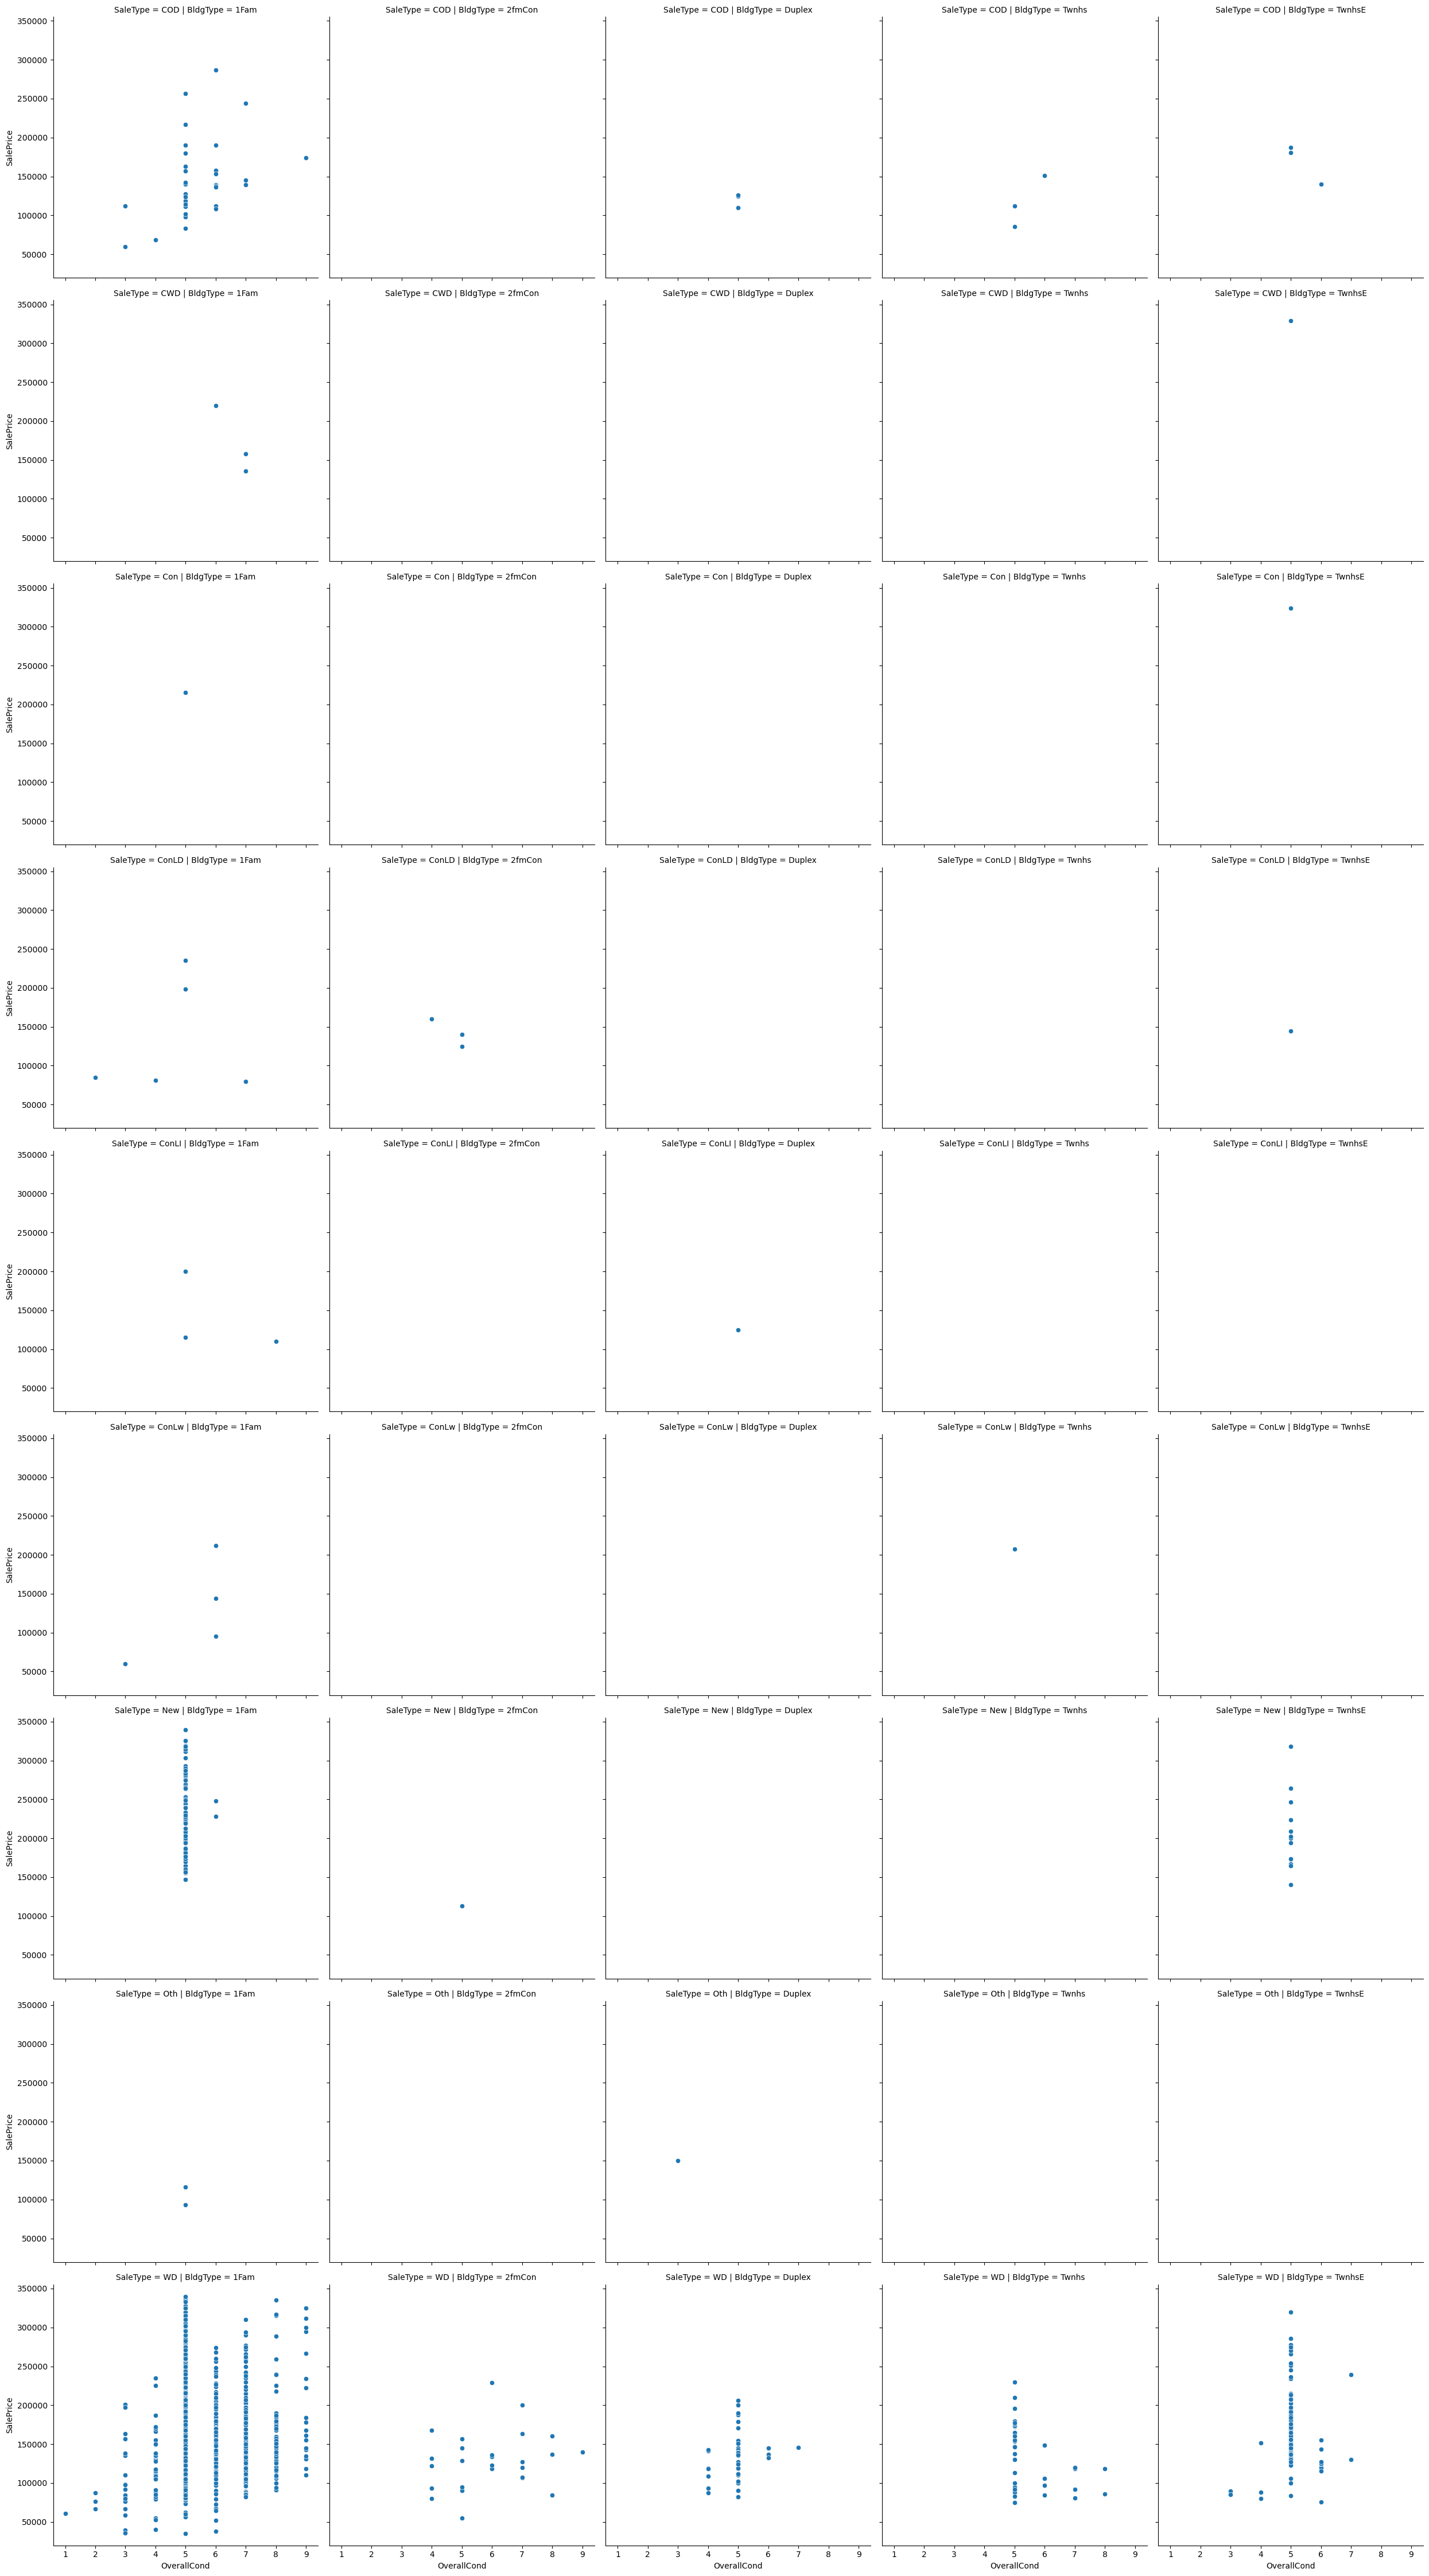

In [34]:
relplot(data=df_new, y="SalePrice", x="OverallCond", row="SaleType", col="BldgType")
"""Se observan que la mayor cantidad de ventas se realizarón con un SaleType de WD"""

In [35]:
from pandas import cut
print(df_new["Fireplaces"].value_counts())
df_temporal=df_new
df_temporal["decade_7"]=cut(df_new.YearBuilt,8,labels=range(1800,2030,30))
print(df_temporal["decade_7"].value_counts().sort_values(ascending=False))
"""Se observan que la mayor cantidad de las viviendas vendidas no tienen chimenea y que la mayor
cantidad de viviendas que fueron vendidas fueron construidas lo más reciente """

0    689
1    607
2    100
3      3
Name: Fireplaces, dtype: int64
2010    479
1950    313
1920    178
1980    175
1890    116
1860    111
1830     18
1800      9
Name: decade_7, dtype: int64


C:\Users\auror\AppData\Local\Temp\ipykernel_23504\3982355947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temporal["decade_7"]=cut(df_new.YearBuilt,8,labels=range(1800,2030,30))


'Se observan que la mayor cantidad de las viviendas vendidas no tienen chimenea y que la mayor\ncantidad de viviendas que fueron vendidas fueron construidas lo más reciente '

## Observaciones

In [36]:

"""Se observa que para la mayoria de los vecindarios se obtienen valores altos de SalePrice
en su gran mayoría cuando se aproximan a 3000 pies cuadrados de GrLivArea siendo el tipo
de vivienda (BLdgType) "1Fam" (tipo más vendido), sin embargo, para un tipo "TwnhsE", a pesar de 
tener valores relativamente bajos de GrLivArea obtiene valores altos en vecindarios como Veenker 
y NridgHt."""

"""
Valores de OverallQual (calidad general del material y de acabado) altos hacen que los valores
de SalePrice incrementen, sin embargo a pesar de que la calidad general del material era menor
de 6 hubieron diversas ventas en los estilos de vivienda (HouseStyle) 1.5Fin y 1Story siempre
con 1fam como tipo de vivienda (BldgType).
"""

"""
La mayor cantidad de ventas es de un SaleCondition del tipo "Norm" siempre con un tipo de vivienda
(BldgType) 1Fam. La mayor cantidad de ventas con OverallCond (condición general) fue de >= 5,
incluso se observan en un valor de este de 7 aproximadamente los valores de SalePrice más altos 
independiente del tipo de vivienda (BldgType).
"""

"""Se observan que la mayor cantidad de ventas se realizarón con un SaleType de WD"""

"""Se ve que la mayor cantidad de las viviendas vendidas no tienen chimenea y que la mayor
cantidad de viviendas que fueron vendidas fueron construidas lo más recientemente """

"""Un incremento o disminución del SalePrice de la vivienda esta relacionado en su gran mayoría
con variables cuantitativas como: GrLivArea, Garaje, Cars, GarajeArea, YearBuilt y TotalBsmtSf 
evidenciado mediante el mapa de calor del análisis univariente que a su vez se encuentran 
afectadas por variables categoricas como: BLdgType, OverallQual,HouseStyle, SaleCondition,SaleType evidenciado en las 
gráficas relplot del análisis multivariente."""


'Un incremento o disminución del SalePrice de la vivienda esta relacionado en su gran mayoría\ncon variables cuantitativas como: GrLivArea, Garaje, Cars, GarajeArea, YearBuilt y TotalBsmtSf \nevidenciado mediante el mapa de calor del análisis univariente que a su vez se encuentran \nafectadas por variables categoricas como: BLdgType, OverallQual,HouseStyle, SaleCondition,SaleType evidenciado en las \ngráficas relplot del análisis multivariente.'